<a href="https://colab.research.google.com/github/Macklane2000/Desafio1JuanData/blob/master/IA_aplicada_a_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">IA aplicada a Data Science: Utilizando IA en la construcci√≥n de visualizaciones de datos</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de M√©xico a trav√©s de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de p√∫blico. Posee una serie de centros de distribuci√≥n (CDs) para la entrega de sus productos, la mayor√≠a de ellos situados en el estado de Mexico.

Para gestionar su alcance, as√≠ como la facturaci√≥n de su sector en tiendas online, consolida los datos en diferentes per√≠odos de tiempo y eval√∫a estos datos para generar insights y tomar decisiones estrat√©gicas en su negocio. En este proyecto, tendremos acceso a los datos de parte de su clientela de e-commerce durante el a√±o 2023.

T√∫, como analista de datos de la empresa, necesitar√°s generar visualizaciones que ayuden en la elaboraci√≥n de informes de acuerdo con algunas premisas proporcionadas por las partes interesadas, realizando un r√°pido an√°lisis de la clientela que tenemos en la tienda virtual y de la facturaci√≥n de la empresa.

**Problema de negocio:**

El equipo de datos de Zoop necesita extraer los datos y generar informaci√≥n a trav√©s de visuales que puedan presentarse a la directiva de la empresa, destacando los datos de facturaci√≥n, perfil del cliente y otros indicadores que puedan ayudar en la toma de decisiones en su tienda online.

**Base de datos**

Vamos a importar dos bases de datos:

Datos de los clientes del e-commerce de Zoop, separados por el c√≥digo identificador de la compra.

Datos de ventas del e-commerce de Zoop en 2023, separados por el c√≥digo identificador de la compra.

Estos datos se leer√°n desde el repositorio compartido en GitHub.

**Desaf√≠o**

T√∫, como analista de datos del equipo de datos de Zoop, tienes el desaf√≠o de extraer los datos de ambas bases y construir visualizaciones que puedan agregar valor a la presentaci√≥n de los resultados de Zoop en 2023. Para ello, se te presentar√°n 7 preguntas para que puedas contribuir en la construcci√≥n del storytelling de las ventas de la empresa.

Para agilizar el proceso de an√°lisis exploratorio de datos (AED) y la creaci√≥n de visuales, utilizaremos la IA de ChatGPT como nuestra asistente, teniendo en cuenta el corto plazo para los an√°lisis y la calidad de la entrega.

## **1.2 - Obteniendo los datos**

---



Vamos inicialmente a proveer el link del repositorio con las dos bases que utilizaremos en el proyecto:

In [66]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

Despu√©s de esta etapa, vamos a crear 2 dataframes con los datos de los clientes y de las ventas de Zoop separadamente y realizar una peque√±a verificaci√≥n en las tablas extra√≠das.

In [67]:
# Imporrta las bibliotecas
import pandas as pd
import warnings # Evitar que aparezcan advertencias en pantalla

warnings.filterwarnings("ignore") # filterwarnings filtra todas las advertencia

In [68]:
clientes = pd.read_csv(url_clientes) # Generar el df clientes
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [69]:
ventas = pd.read_csv(url_ventas) # Generar el df ventas
ventas.head()

ID_compra       fecha horario                    categoria  \
0          6  2023-01-03   20:40                 Electr√≥nicos   
1          5  2023-01-03   21:48  Herramientas y construcci√≥n   
2          9  2023-01-03   17:08            Belleza e higiene   
3          4  2023-01-03   14:29  Herramientas y construcci√≥n   
4          8  2023-01-03   18:02            Belleza e higiene   

   precio_unitario  cantidad   envio         metodo_pago  
0           4457.9         4  713.26              Paypal  
1            115.9         1    0.00       Transferencia  
2             68.9         2   13.78  Tarjeta de Cr√©dito  
3             80.9         5   40.45       Transferencia  
4            165.0         4    0.00       Transferencia

## **1.3 - Entendiendo los datos**

---


Ahora, vamos a explorar los datos comprendiendo lo que significan y c√≥mo podemos relacionarlos en la construcci√≥n de las visualizaciones.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como analistas de datos de una e-commerce. Recibimos dos bases de datos con los datos de los clientes y de las ventas en 2023, respectivamente.

En este primer momento, vamos a explorar la base de clientes en formato de un DataFrame de pandas, llamado "clientes". Contiene datos de los clientes que realizaron compras en la tienda virtual, siendo estos: ID de la compra, ID del cliente, la ciudad, estado y regi√≥n de la compra, edad, sexo biol√≥gico, si participan en el programa de cashback y la calificaci√≥n, o nota, de la compra.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base ya est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

Perfecto, aqu√≠ tienes un conjunto de comandos en Python utilizando **Pandas** que puedes usar para explorar el DataFrame `clientes` y conocer mejor sus atributos y distribuci√≥n:


import pandas as pd

### Ver las primeras filas del DataFrame
```python
clientes.head()
```

### Informaci√≥n general sobre el DataFrame (columnas, tipos de datos, valores nulos)
```python
clientes.info()
```

### Estad√≠sticas descriptivas de columnas num√©ricas (como edad y nota)
```python
clientes.describe()
```

### Conteo de valores √∫nicos por columna (√∫til para variables categ√≥ricas)
```python
clientes.nunique()
```

# Distribuci√≥n de clientes por sexo biol√≥gico
```python
clientes['sexo'].value_counts()
```

# Distribuci√≥n por regi√≥n
```python
clientes['regi√≥n'].value_counts()
```

# Porcentaje de participaci√≥n en el programa de cashback
```python
clientes['cashback'].value_counts(normalize=True)
```

### Promedio de edad y nota por sexo
```python
clientes.groupby('sexo')[['edad', 'nota']].mean()
```

# Promedio de nota por participaci√≥n en el programa de cashback
```python
clientes.groupby('cashback')['nota'].mean()
```

# Distribuci√≥n de edades (opcional si quieres visualizarla con un histograma)
```python
clientes['edad'].hist(bins=10)
```

Con este conjunto de comandos obtendr√°s un buen panorama del contenido del DataFrame: sus caracter√≠sticas generales, c√≥mo se distribuyen ciertas variables clave, y algunos cruces relevantes (como si el cashback influye en la nota promedio). ¬øTe gustar√≠a que tambi√©n gener√°ramos algunos gr√°ficos para visualizar mejor los datos?


In [70]:
# Ver las primeras filas del DataFrame
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [71]:
# Informaci√≥n general sobre el DataFrame (columnas, tipos de datos, valores nulos)
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_compra       6169 non-null   int64 
 1   ID_cliente      6169 non-null   int64 
 2   ciudad          6169 non-null   object
 3   estado          6169 non-null   object
 4   region          6169 non-null   object
 5   edad            6169 non-null   int64 
 6   sexo_biologico  6169 non-null   object
 7   cashback        6169 non-null   object
 8   nota            6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [72]:
# Estad√≠sticas descriptivas de columnas num√©ricas (como ID_compra,	ID_cliente,	edad y nota)
clientes.describe()

ID_compra   ID_cliente         edad         nota
count  6169.000000  6169.000000  6169.000000  6169.000000
mean   3085.000000  5461.475280    38.260010     8.443670
std    1780.981237  2610.959977     9.838951     1.730584
min       1.000000  1005.000000    18.000000     0.000000
25%    1543.000000  3148.000000    31.000000     8.000000
50%    3085.000000  5436.000000    38.000000     9.000000
75%    4627.000000  7748.000000    45.000000     9.000000
max    6169.000000  9999.000000    70.000000    10.000000

In [73]:
# Conteo de valores √∫nicos por columna (√∫til para variables categ√≥ricas)
clientes.nunique()

ID_compra         6169
ID_cliente        4453
ciudad              94
estado              28
region               9
edad                53
sexo_biologico       2
cashback             2
nota                11
dtype: int64

In [74]:
# Distribuci√≥n de clientes por sexo biol√≥gico
clientes['sexo_biologico'].value_counts()

sexo_biologico
Femenino     3371
Masculino    2798
Name: count, dtype: int64

In [75]:
# Distribuci√≥n por regi√≥n
clientes['region'].value_counts()

region
Centro          1540
Noroeste        1276
Noreste          907
Occidente        556
Centro-Norte     533
Golfo            411
Centro-Sur       383
Sur              284
Sureste          279
Name: count, dtype: int64

In [76]:
# Porcentaje de participaci√≥n en el programa de cashback
clientes['cashback'].value_counts(normalize=True)

cashback
No    0.576593
S√≠    0.423407
Name: proportion, dtype: float64

In [77]:
# Promedio de edad y nota por sexo
clientes.groupby('sexo_biologico')[['edad', 'nota']].mean()

edad      nota
sexo_biologico                     
Femenino        38.318896  8.489172
Masculino       38.189064  8.388849

In [78]:
# Promedio de nota por participaci√≥n en el programa de cashback
clientes.groupby('cashback')['nota'].mean()

cashback
No    8.443632
S√≠    8.443721
Name: nota, dtype: float64

<Axes: >

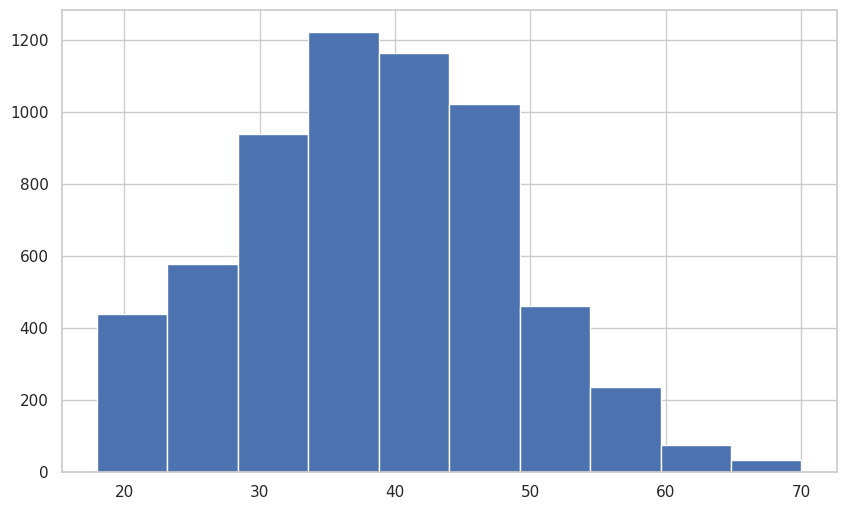

In [79]:
# Distribuci√≥n de edades (opcional si quieres visualizarla con un histograma)
clientes['edad'].hist(bins=10)


In [80]:
# Comprobar la cantidad de datos faltantes por columna
clientes.isnull().sum()

ID_compra         0
ID_cliente        0
ciudad            0
estado            0
region            0
edad              0
sexo_biologico    0
cashback          0
nota              0
dtype: int64

### **Base de ventas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos explorar la base de ventas en formato de un DataFrame, llamado "ventas". Contiene datos de las ventas del comercio electr√≥nico, que son: ID de la compra, fecha de la compra, hora de la compra, categor√≠a del producto, precio unitario del producto, cantidad vendida, env√≠o y el m√©todo de pago.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base tambi√©n est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

Aqu√≠ tienes una celda de c√≥digo en Python para hacer una exploraci√≥n inicial del DataFrame `ventas` de forma eficiente y completa:



## Exploraci√≥n general del DataFrame "ventas"
```python
### Muestra las primeras filas
ventas.head()
```

```python
### Informaci√≥n general del DataFrame
ventas.info()          
```

```python
### Estad√≠sticas descriptivas para columnas num√©ricas
ventas.describe()        
```

```python
### Conteo de valores √∫nicos por columna
ventas.nunique()                       
```

```python
### Distribuci√≥n de ventas por categor√≠a de producto
ventas['categor√≠a'].value_counts()
```

```python
### M√©todos de pago m√°s utilizados
ventas['m√©todo_de_pago'].value_counts()
```

```python
### Estad√≠sticas de precio unitario por categor√≠a
ventas.groupby('categor√≠a')['precio_unitario'].describe()
```

```python
### Calcular ingresos por venta (precio_unitario * cantidad)
ventas['ingreso'] = ventas['precio_unitario'] * ventas['cantidad_vendida']
```

```python
### Ingreso total por categor√≠a
ventas.groupby('categor√≠a')['ingreso'].sum().sort_values(ascending=False)
```

```python
### Estad√≠sticas de env√≠os
ventas['env√≠o'].value_counts()
```

```python
### Conversi√≥n de fecha y hora para an√°lisis temporal (si no est√°n en datetime)
ventas['fecha_de_la_compra'] = pd.to_datetime(ventas['fecha_de_la_compra'])
ventas['hora_de_la_compra'] = pd.to_datetime(ventas['hora_de_la_compra'], format='%H:%M:%S').dt.hour
```

```python
### Ventas por hora del d√≠a
ventas['hora_de_la_compra'].value_counts().sort_index()
```

Este c√≥digo te ayudar√° a obtener un panorama claro de:

* C√≥mo est√°n distribuidos los productos y m√©todos de pago,
* El comportamiento de los precios,
* Cu√°les categor√≠as generan m√°s ingresos,
* En qu√© horas se concentran m√°s compras.

In [81]:
# --- Exploraci√≥n general del DataFrame "ventas" ---

# Muestra las primeras filas
ventas.head()

ID_compra       fecha horario                    categoria  \
0          6  2023-01-03   20:40                 Electr√≥nicos   
1          5  2023-01-03   21:48  Herramientas y construcci√≥n   
2          9  2023-01-03   17:08            Belleza e higiene   
3          4  2023-01-03   14:29  Herramientas y construcci√≥n   
4          8  2023-01-03   18:02            Belleza e higiene   

   precio_unitario  cantidad   envio         metodo_pago  
0           4457.9         4  713.26              Paypal  
1            115.9         1    0.00       Transferencia  
2             68.9         2   13.78  Tarjeta de Cr√©dito  
3             80.9         5   40.45       Transferencia  
4            165.0         4    0.00       Transferencia

In [82]:
# Informaci√≥n general del DataFrame
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [83]:
# Estad√≠sticas descriptivas para columnas num√©ricas
ventas.describe()

ID_compra  precio_unitario     cantidad        envio
count  6169.000000      6169.000000  6169.000000  6169.000000
mean   3085.000000       873.234738     3.004863   119.233832
std    1780.981237      1852.064342     1.420725   366.149225
min       1.000000         2.900000     1.000000     0.000000
25%    1543.000000        44.900000     2.000000     0.320000
50%    3085.000000        93.900000     3.000000     7.550000
75%    4627.000000       221.900000     4.000000    29.240000
max    6169.000000      8000.000000     5.000000  4521.540000

In [84]:
# Conteo de valores √∫nicos por columna
ventas.nunique()

ID_compra          6169
fecha               304
horario             659
categoria             8
precio_unitario    1655
cantidad              5
envio              2934
metodo_pago           4
dtype: int64

In [85]:
# Distribuci√≥n de ventas por categor√≠a de producto
ventas['categoria'].value_counts()

categoria
Alimentos y bebidas            1495
Belleza e higiene              1062
Casa y aseo                    1041
Electrodom√©sticos               665
Electr√≥nicos                    580
Papeler√≠a y oficina             551
Herramientas y construcci√≥n     474
Libros                          301
Name: count, dtype: int64

In [86]:
# M√©todos de pago m√°s utilizados
ventas['metodo_pago'].value_counts()

metodo_pago
Tarjeta de Cr√©dito    2851
Transferencia         2244
Tarjeta de D√©bito      547
Paypal                 527
Name: count, dtype: int64

In [87]:
# Estad√≠sticas de precio unitario por categor√≠a
ventas.groupby('categoria')['precio_unitario'].describe()

count         mean          std     min     25%  \
categoria                                                                       
Alimentos y bebidas          1495.0    51.735184    28.490768     2.9    26.9   
Belleza e higiene            1062.0   133.841620    68.862839    15.9    70.9   
Casa y aseo                  1041.0   103.244669    55.293187     5.9    57.0   
Electrodom√©sticos             665.0  2179.821504  1157.366138    54.9  1141.9   
Electr√≥nicos                  580.0  6008.219483  1181.328441  4001.9  5005.4   
Herramientas y construcci√≥n   474.0   182.418565    96.449647    20.9    94.9   
Libros                        301.0    82.242193    39.202970    15.9    48.9   
Papeler√≠a y oficina           551.0    26.231579    14.049762     2.9    13.4   

                                 50%      75%     max  
categoria                                              
Alimentos y bebidas            51.90    76.90   100.0  
Belleza e higiene             133.90   195.65   250.0  
Casa y aseo                   102.90   150.90   200.0  
Electrodom√©sticos            2271.90  3170.90  3996.9  
Electr√≥nicos                 5965.90  7098.15  8000.0  
Herramientas y construcci√≥n   183.45   266.65   350.0  
Libros                         79.90   116.90   149.9  
Papeler√≠a y oficina            26.90    37.00    49.9

In [88]:
# Calcular ingresos por venta (precio_unitario * cantidad)
# ventas['ingreso'] = ventas['precio_unitario'] * ventas['cantidad_vendida']

In [89]:
# Ingreso total por categor√≠a
# ventas.groupby('categoria')['ingreso'].sum().sort_values(ascending=False)

In [90]:
# Estad√≠sticas de env√≠os
ventas['envio'].value_counts()

envio
0.00       1500
3.35         13
1.20         12
2.09         11
5.39         10
           ... 
2224.30       1
20.36         1
69.80         1
43.18         1
24.82         1
Name: count, Length: 2934, dtype: int64

In [91]:
# Conversi√≥n de fecha y hora para an√°lisis temporal (si no est√°n en datetime)
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d', errors='coerce')

# ventas['fecha'] = pd.to_datetime(ventas['fecha']): Esto selecciona la columna llamada 'fecha' dentro de tu DataFrame dfCompleto.
# pd.to_datetime(): Esta es una funci√≥n de la librer√≠a pandas que se utiliza espec√≠ficamente para convertir argumentos
# a objetos de fecha y hora (datetime).
# pd.to_datetime(dfCompleto['fecha']): Aqu√≠, la funci√≥n pd.to_datetime toma toda la columna 'fecha' como entrada e intenta
# convertir cada uno de sus valores a un formato de fecha y hora est√°ndar de pandas.
# dfCompleto['fecha'] = ...: El resultado de esta conversi√≥n (la columna 'fecha' con los valores ahora en formato datetime)
# se asigna de nuevo a la columna 'fecha' en el DataFrame dfCompleto, sobrescribiendo los valores originales.

In [92]:
ventas.describe()

ID_compra                          fecha  precio_unitario  \
count  6169.000000                           6169      6169.000000   
mean   3085.000000  2023-08-20 00:12:22.292105984       873.234738   
min       1.000000            2023-01-03 00:00:00         2.900000   
25%    1543.000000            2023-05-30 00:00:00        44.900000   
50%    3085.000000            2023-08-31 00:00:00        93.900000   
75%    4627.000000            2023-11-23 00:00:00       221.900000   
max    6169.000000            2023-12-31 00:00:00      8000.000000   
std    1780.981237                            NaN      1852.064342   

          cantidad        envio  
count  6169.000000  6169.000000  
mean      3.004863   119.233832  
min       1.000000     0.000000  
25%       2.000000     0.320000  
50%       3.000000     7.550000  
75%       4.000000    29.240000  
max       5.000000  4521.540000  
std       1.420725   366.149225

In [93]:
ventas['horario'] = pd.to_datetime(ventas['horario'])

In [94]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_compra        6169 non-null   int64         
 1   fecha            6169 non-null   datetime64[ns]
 2   horario          6169 non-null   datetime64[ns]
 3   categoria        6169 non-null   object        
 4   precio_unitario  6169 non-null   float64       
 5   cantidad         6169 non-null   int64         
 6   envio            6169 non-null   float64       
 7   metodo_pago      6169 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 385.7+ KB


In [95]:
ventas.describe()

ID_compra                          fecha  \
count  6169.000000                           6169   
mean   3085.000000  2023-08-20 00:12:22.292105984   
min       1.000000            2023-01-03 00:00:00   
25%    1543.000000            2023-05-30 00:00:00   
50%    3085.000000            2023-08-31 00:00:00   
75%    4627.000000            2023-11-23 00:00:00   
max    6169.000000            2023-12-31 00:00:00   
std    1780.981237                            NaN   

                             horario  precio_unitario     cantidad  \
count                           6169      6169.000000  6169.000000   
mean   2025-06-29 17:39:13.159345152       873.234738     3.004863   
min              2025-06-29 00:00:00         2.900000     1.000000   
25%              2025-06-29 16:45:00        44.900000     2.000000   
50%              2025-06-29 18:48:00        93.900000     3.000000   
75%              2025-06-29 22:09:00       221.900000     4.000000   
max              2025-06-29 23:59:00      8000.000000     5.000000   
std                              NaN      1852.064342     1.420725   

             envio  
count  6169.000000  
mean    119.233832  
min       0.000000  
25%       0.320000  
50%       7.550000  
75%      29.240000  
max    4521.540000  
std     366.149225

In [96]:
# Ventas por hora del d√≠a
ventas['horario'].value_counts().sort_index()

horario
2025-06-29 00:00:00     9
2025-06-29 00:01:00     8
2025-06-29 00:02:00    10
2025-06-29 00:03:00    16
2025-06-29 00:04:00    14
                       ..
2025-06-29 23:55:00    18
2025-06-29 23:56:00    26
2025-06-29 23:57:00    16
2025-06-29 23:58:00    13
2025-06-29 23:59:00    19
Name: count, Length: 659, dtype: int64

## **1.4 - Tipos de gr√°ficos**

---


Ya hemos explorado un poco de las dos bases del proyecto y obtuvimos algunos insights interesantes que pueden ser importantes en la construcci√≥n de nuestras visualizaciones.

Ahora, intentemos simplificar nuestro an√°lisis consolidando los datos en una √∫nica tabla para, a partir de ah√≠, enfocarnos en las posibilidades de visuales combinando los datos. ¬øPodr√° GPT ayudarnos aqu√≠?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Adem√°s, organizaremos las columnas en la siguiente secuencia:

* ID_compra
* fecha
* horario
* categoria
* precio_unitario
* cantidad
* envio
* metodo_pago
* ID_cliente
* edad
* sexo_biologico
* ciudad
* estado
* region
* cashback
* nota

Construye un c√≥digo para ejecutar esta etapa usando Python y la biblioteca Pandas.


In [97]:
# Unir las dos bases usando la columna 'ID_compra' como clave
dfCompleto = pd.merge(ventas, clientes, on='ID_compra', how='inner')

'''pd.merge(): Esta es una funci√≥n de la librer√≠a pandas que se utiliza para combinar dos DataFrames.
ventas, clientes: Son los dos DataFrames que se van a combinar. En este caso, son los DataFrames ventas y clientes.
on='ID_compra': Especifica la columna o columnas que se utilizar√°n como clave para la combinaci√≥n.
Aqu√≠, se utiliza la columna ID_compra, que est√° presente en ambos DataFrames, para encontrar las filas coincidentes.
how='inner': Define el tipo de join o combinaci√≥n que se realizar√°. Un 'inner' join (uni√≥n interna) incluye solo las filas
donde los valores de la columna clave (ID_compra) coinciden en ambos DataFrames.
Las filas que no tienen una coincidencia en el otro DataFrame se descartan.
dfCompleto =: El resultado de la combinaci√≥n se asigna a una nueva variable llamada dfCompleto,
creando as√≠ un nuevo DataFrame que contiene la informaci√≥n combinada de ventas y clientes solo para las compras
que existen en ambos conjuntos de datos.'''

"pd.merge(): Esta es una funci√≥n de la librer√≠a pandas que se utiliza para combinar dos DataFrames.\nventas, clientes: Son los dos DataFrames que se van a combinar. En este caso, son los DataFrames ventas y clientes.\non='ID_compra': Especifica la columna o columnas que se utilizar√°n como clave para la combinaci√≥n.\nAqu√≠, se utiliza la columna ID_compra, que est√° presente en ambos DataFrames, para encontrar las filas coincidentes.\nhow='inner': Define el tipo de join o combinaci√≥n que se realizar√°. Un 'inner' join (uni√≥n interna) incluye solo las filas\ndonde los valores de la columna clave (ID_compra) coinciden en ambos DataFrames.\nLas filas que no tienen una coincidencia en el otro DataFrame se descartan.\ndfCompleto =: El resultado de la combinaci√≥n se asigna a una nueva variable llamada dfCompleto,\ncreando as√≠ un nuevo DataFrame que contiene la informaci√≥n combinada de ventas y clientes solo para las compras\nque existen en ambos conjuntos de datos."

In [98]:
# Reordenar las columnas en el orden solicitado
ordenColumnas = [
    'ID_compra',
    'fecha',
    'horario',
    'categoria',
    'precio_unitario',
    'cantidad',
    'envio',
    'metodo_pago',
    'ID_cliente',
    'edad',
    'sexo_biologico',
    'ciudad',
    'estado',
    'region',
    'cashback',
    'nota'
]

dfCompleto = dfCompleto[ordenColumnas]

In [99]:
dfCompleto.head()

ID_compra      fecha             horario                    categoria  \
0          6 2023-01-03 2025-06-29 20:40:00                 Electr√≥nicos   
1          5 2023-01-03 2025-06-29 21:48:00  Herramientas y construcci√≥n   
2          9 2023-01-03 2025-06-29 17:08:00            Belleza e higiene   
3          4 2023-01-03 2025-06-29 14:29:00  Herramientas y construcci√≥n   
4          8 2023-01-03 2025-06-29 18:02:00            Belleza e higiene   

   precio_unitario  cantidad   envio         metodo_pago  ID_cliente  edad  \
0           4457.9         4  713.26              Paypal        6149    30   
1            115.9         1    0.00       Transferencia        9491    36   
2             68.9         2   13.78  Tarjeta de Cr√©dito        5288    39   
3             80.9         5   40.45       Transferencia        9679    35   
4            165.0         4    0.00       Transferencia        1380    50   

  sexo_biologico            ciudad            estado        region cashback  \
0      Masculino        Hermosillo            Sonora      Noroeste       S√≠   
1      Masculino  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠   
2       Femenino    Aguascalientes    Aguascalientes  Centro-Norte       No   
3      Masculino          Veracruz          Veracruz         Golfo       S√≠   
4      Masculino  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No   

   nota  
0    10  
1     8  
2     7  
3     9  
4     9

Ahora le pediremos a ChatGPT ideas de visuales que podamos contruir con esos datos

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generaci√≥n de visuales que puedan ayudar en el an√°lisis de la facturaci√≥n a lo largo del a√±o, el perfil del cliente y otros datos que puedan ser relevantes para el an√°lisis y la construcci√≥n de nuestra narrativa.

Las columnas de "df" son:

* ID_compra: n√∫mero √∫nico asignado a la compra realizada, en formato int
* fecha: fecha de la compra, en formato datetime
* horario: hora de la compra, en formato object
* categoria: categor√≠a del producto, en formato object
* precio_unitario: precio de una unidad del producto, en formato float
* cantidad: cantidad vendida del producto, en formato int
* envio: costo de env√≠o a ser pagado en total de la compra, en formato float
* metodo_pago: m√©todo de pago de la compra, en formato object
* ID_cliente: n√∫mero √∫nico asignado al cliente, en formato int
* edad: edad del cliente, en formato int
* sexo_biologico: sexo biol√≥gico del cliente, en formato object
* ciudad: ciudad del cliente, en formato object
* estado: estado del cliente, en formato object
* region: regi√≥n del cliente, en formato object
* cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
* nota: evaluaci√≥n del cliente por la compra, en formato int

El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el an√°lisis de los datos de los clientes y ventas de Zoop.

Con base en la informaci√≥n proporcionada, ¬øqu√© tipos de visualizaciones ser√≠an √∫tiles para alcanzar el objetivo de analizar los datos?

¬°Excelente! Est√°s en una etapa clave del an√°lisis: **la generaci√≥n de visualizaciones para descubrir patrones, tendencias y comportamientos relevantes**. Bas√°ndonos en la estructura de tu DataFrame `df`, aqu√≠ tienes una propuesta organizada por **objetivo de an√°lisis** y los tipos de visualizaciones m√°s adecuados:

---

### üìä **1. An√°lisis de facturaci√≥n a lo largo del a√±o**

**Objetivo:** Entender la evoluci√≥n de las ventas, ingresos y demanda por producto.

**Visualizaciones sugeridas:**

* **Serie temporal de ingresos mensuales** (`precio_unitario * cantidad + envio`) ‚Üí `lineplot`
* **Facturaci√≥n total por categor√≠a** ‚Üí `barplot`
* **Facturaci√≥n por m√©todo de pago** ‚Üí `pie chart` o `barplot`
* **Ingresos por regi√≥n o estado** ‚Üí `mapa de calor` o `choropleth map` (si se quiere georreferenciar)
* **Distribuci√≥n de compras por hora del d√≠a** ‚Üí `histograma` o `lineplot`

---

### üë• **2. An√°lisis del perfil del cliente**

**Objetivo:** Comprender qui√©nes son los clientes que compran y c√≥mo compran.

**Visualizaciones sugeridas:**

* **Distribuci√≥n de edad** ‚Üí `histograma` o `boxplot`
* **Distribuci√≥n por sexo biol√≥gico** ‚Üí `pie chart` o `barplot`
* **Distribuci√≥n de edad por sexo biol√≥gico** ‚Üí `violinplot` o `boxplot`
* **Participaci√≥n en el cashback por regi√≥n o grupo etario** ‚Üí `grouped barplot`
* **Nota promedio por grupo etario o sexo** ‚Üí `barplot`

---

### üõí **3. An√°lisis de comportamiento de compra**

**Objetivo:** Explorar patrones de compra seg√∫n productos, horarios y forma de pago.

**Visualizaciones sugeridas:**

* **Cantidad de productos vendidos por categor√≠a** ‚Üí `barplot`
* **Horas con m√°s ventas** ‚Üí `lineplot` o `heatmap` por d√≠a y hora
* **Relaci√≥n entre cantidad y nota dada por los clientes** ‚Üí `scatterplot`
* **M√©todo de pago por grupo de edad o regi√≥n** ‚Üí `stacked barplot`

---

### üí¨ **4. Relaci√≥n entre variables clave**

**Objetivo:** Descubrir correlaciones o asociaciones significativas.

**Visualizaciones sugeridas:**

* **Correlaci√≥n entre precio, cantidad, nota y edad** ‚Üí `heatmap` de correlaci√≥n
* **Ingreso total vs. edad del cliente** ‚Üí `scatterplot`
* **Nota promedio por m√©todo de pago o por categor√≠a** ‚Üí `barplot`

---

### üìç **Extra: visualizaci√≥n geogr√°fica (si tienes mapas de referencia por estado o ciudad)**

**Objetivo:** Mostrar diferencias regionales.

**Visualizaciones sugeridas:**

* **Mapa de calor por estado con facturaci√≥n** ‚Üí `folium` o `plotly choropleth`
* **Distribuci√≥n de clientes por ciudad o estado** ‚Üí `barplot` o `mapa interactivo`

---

¬øTe gustar√≠a que te ayude a empezar a construir algunas de estas visualizaciones con c√≥digo espec√≠fico? Puedo generar el c√≥digo para Matplotlib, Seaborn o Plotly, seg√∫n prefieras.


In [100]:
# Importaci√≥n de bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# **Clase 2 - Visualizando los dados**

ChatGPT trajo algunas ideas interesantes para la creaci√≥n de los gr√°ficos.

Sin embargo, como ya tenemos algunas preguntas para guiarnos en la creaci√≥n de los visuales, no vamos a seguir todas las sugerencias aqu√≠ mencionadas.

Queda como una sugerencia para ayudarte cuando est√©s trabajando con otras bases y tengas dificultades para pensar en qu√© visualizaciones podr√≠as construir.

**Observaci√≥n:** Recordando que es muy probable que los gr√°ficos que se me se√±alaron, no sean necesariamente los mismos que aparecer√°n para ti, dado a la aleatoriedad de las respuestas de cualquier IA generativa.

## **2.1 - Definiendo los visualizaciones**

---

Despu√©s de la etapa de exploraci√≥n de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. As√≠, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### **Preguntas**

#### Ventas

1. ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?
2. ¬øCu√°l fue la facturaci√≥n por categor√≠a en 2023?
3. ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?
4. ¬øC√≥mo se divide la venta por trimestre por m√©todo de pago? ¬øExiste un per√≠odo en que alg√∫n tipo de pago se destaca?


#### Perfil del cliente

5. ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?
6. ¬øC√≥mo est√°n distribuidas las evaluaciones del producto? ¬øTenemos buenos n√∫meros generales?
7. ¬øC√≥mo se distribuye nuestro p√∫blico por edad y sexo biol√≥gico? ¬øExiste un grupo que se destaca?

Inicialmente, vamos a hacer la primera versi√≥n de los gr√°ficos, a√∫n no refinados con los elementos visuales, para m√°s adelante ir a√±adiendo las diversas t√©cnicas de storytelling.

### **1ra Pregunta:** ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?

Le vamos pedir a ChatGPT que nos auxilie en la construcci√≥n de este visual. Primero, trataremos los datos generando una tabla resumida (que tambi√©n es una especie de visual) y luego construiremos el primer gr√°fico.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cu√°les m√©todos de pago fueron los m√°s utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuaci√≥n, deseamos crear una visualizaci√≥n que muestre la cantidad de esos m√©todos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [101]:
# Construir una tabla que resuma los datos de la columna "metodo_pago"
metodosPago = dfCompleto['metodo_pago'].value_counts().reset_index()

'''dfCompleto['metodo_pago']: Selecciona la columna 'metodo_pago' del DataFrame dfCompleto.
.value_counts(): Este m√©todo cuenta cu√°ntas veces aparece cada valor √∫nico en la columna 'metodo_pago'.
El resultado es una Serie de pandas donde el √≠ndice son los valores √∫nicos (los m√©todos de pago) y los valores son las frecuencias
(la cantidad de veces que se utilizaron).
.reset_index(): Convierte la Serie resultante de value_counts() en un DataFrame. El √≠ndice (que eran los m√©todos de pago)
se convierte en una columna normal, y la columna de las frecuencias se convierte en otra columna. Por defecto,
las columnas se llamar√°n 'index' y '0' (o un nombre similar).
metodosPago =: Asigna el DataFrame resultante a la variable metodosPago.'''

metodosPago.columns = ['metodo_pago', 'cantidad']

'''metodosPago.columns: Accede a los nombres de las columnas del DataFrame metodosPago.
= ['metodo_pago', 'cantidad']: Asigna una nueva lista de nombres a las columnas del DataFrame.
Esto renombra las columnas del DataFrame metodosPago a 'metodo_pago' y 'cantidad', respectivamente.
Esto hace que el DataFrame sea m√°s descriptivo y f√°cil de trabajar.'''

# Mostrar la tabla resumen
display(metodosPago)

metodo_pago  cantidad
0  Tarjeta de Cr√©dito      2851
1       Transferencia      2244
2   Tarjeta de D√©bito       547
3              Paypal       527

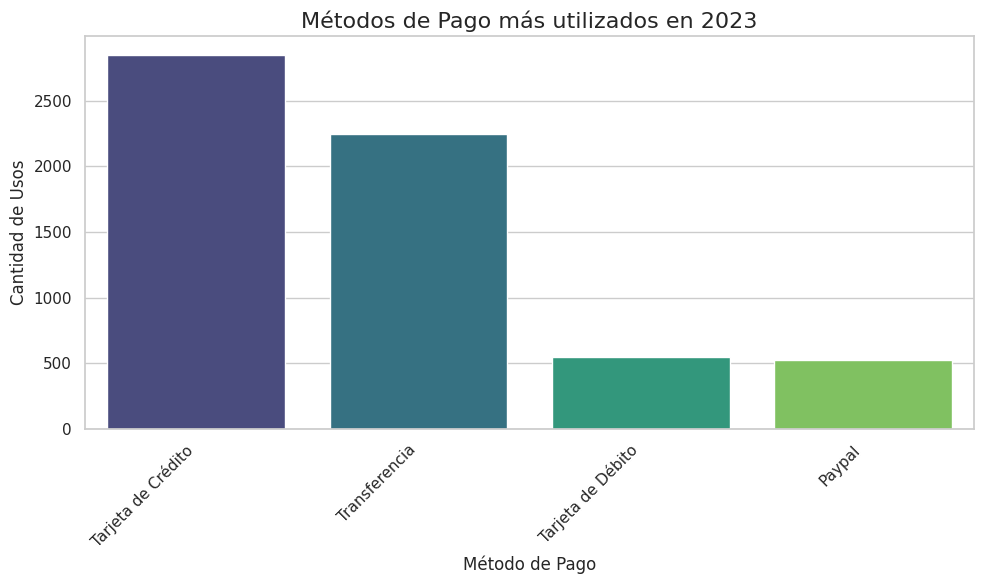

In [102]:
# Crear una visualizaci√≥n (gr√°fico de barras) para mostrar la cantidad de m√©todos de pago
plt.figure(figsize=(10, 6))
sns.barplot(x='metodo_pago', y='cantidad', data=metodosPago, palette='viridis')

# A√±adir etiquetas y t√≠tulo
plt.title('M√©todos de Pago m√°s utilizados en 2023', fontsize=16)
plt.xlabel('M√©todo de Pago', fontsize=12)
plt.ylabel('Cantidad de Usos', fontsize=12)

# Mostrar el gr√°fico
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor visualizaci√≥n si son largas
plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Podemos observar que, incluso sin especificar el tipo de gr√°fico, por la forma en que presentamos los datos a ChatGPT, logr√≥ representar con √©xito un visual que muestra la informaci√≥n deseada. Un gr√°fico de barras es realmente ideal para representar las cantidades de una o m√°s categor√≠as de datos.

Iremos ajustando poco a poco los visuales para que se adecuen a nuestro p√∫blico y reflejen la identidad visual de la empresa.


## **2.2 - Comparando los datos**

---

### **2da Pregunta:** ¬øCu√°l fue la facturaci√≥n por categoria em 2023?

**Observaci√≥n:** Para la facturaci√≥n, consideraremos aqu√≠ el producto entre el precio unitario y la cantidad, sumados al costo de env√≠o de cada producto.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras horizontales que muestre la facturaci√≥n por categor√≠a de Zoop.

En "df", tenemos las siguientes columnas:
* categoria: categor√≠as de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de env√≠o total de la compra.

Deseamos crear una visualizaci√≥n que muestre la facturaci√≥n de cada categor√≠a, donde la facturaci√≥n se calcula multiplicando el precio unitario por la cantidad y sumando el costo de env√≠o.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


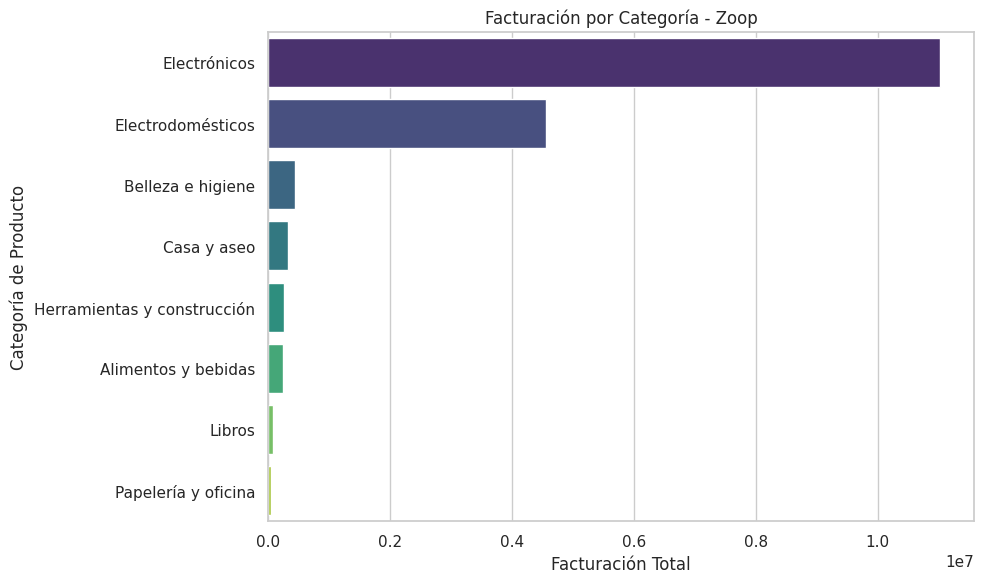

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aseg√∫rate de tener las columnas necesarias en dfCompleto
# Calcular la facturaci√≥n: (precio_unitario * cantidad) + envio
dfCompleto['facturacion'] = dfCompleto['precio_unitario'] * dfCompleto['cantidad'] + dfCompleto['envio']

# Agrupar por categor√≠a y sumar la facturaci√≥n
# facturacion_categoria = dfCompleto.groupby('categoria')['facturacion'].sum().sort_values()
facturacion_categoria = dfCompleto.groupby('categoria')['facturacion'].sum().reset_index().sort_values(by='facturacion', ascending=False)

# Crear gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
# facturacion_categoria.plot(kind='barh', color='mediumseagreen')
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis', orient='h')
plt.xlabel('Facturaci√≥n Total')
plt.ylabel('Categor√≠a de Producto')
plt.title('Facturaci√≥n por Categor√≠a - Zoop')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aqu√≠ especificamos el tipo de gr√°fico, guiando a ChatGPT en la creaci√≥n de nuestro visual. Podemos notar que en un gr√°fico de barras el enfoque est√° m√°s centrado en las categor√≠as, adem√°s de ser una forma m√°s fluida de leer textos que podr√≠an ser demasiado extensos para un gr√°fico de columnas.


### **3a Pregunta:** ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de l√≠neas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturaci√≥n: calculada como el producto del precio unitario y la cantidad, sumado al costo de env√≠o de cada venta.

Deseamos crear una visualizaci√≥n que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del √≠ndice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gr√°fico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

```
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
```


Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


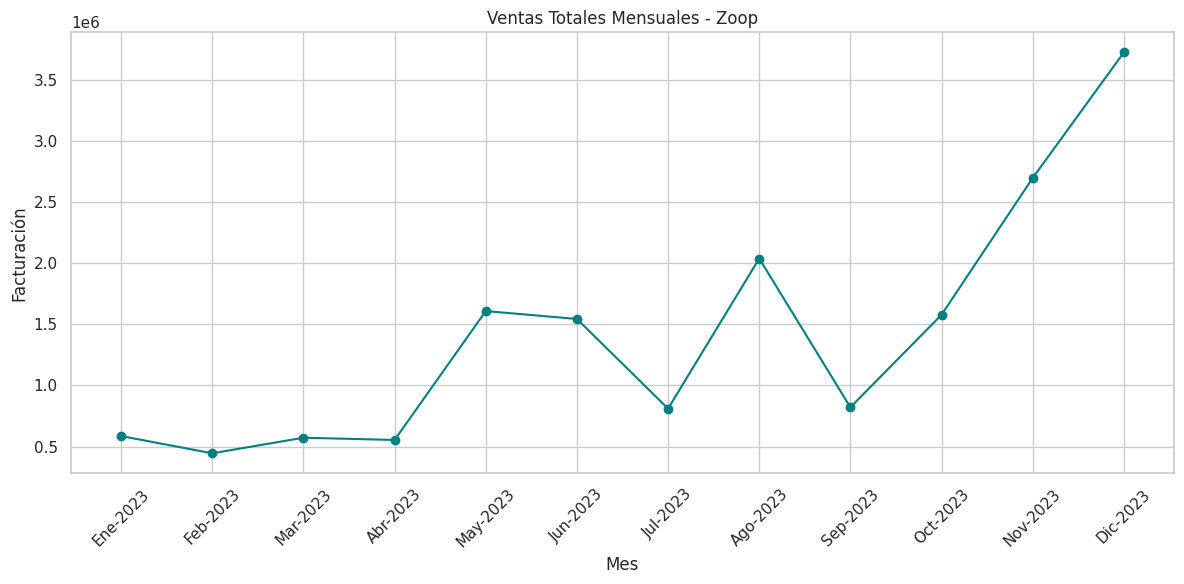

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario de traducci√≥n de meses
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Asegurar que 'fecha' est√© en formato datetime
dfCompleto['fecha'] = pd.to_datetime(dfCompleto['fecha'])

# Extraer a√±o-mes y agrupar por mes para calcular la facturaci√≥n mensual
dfCompleto['a√±o_mes'] = dfCompleto['fecha'].dt.to_period('M').dt.to_timestamp()
ventas_mensuales = dfCompleto.groupby('a√±o_mes')['facturacion'].sum().reset_index()

# Obtener el nombre del mes en ingl√©s y traducirlo al espa√±ol
ventas_mensuales['mes'] = ventas_mensuales['a√±o_mes'].dt.strftime('%B').map(meses)
ventas_mensuales['a√±o'] = ventas_mensuales['a√±o_mes'].dt.year

# Concatenar mes y a√±o para etiquetas del eje x
ventas_mensuales['etiqueta'] = ventas_mensuales['mes'] + '-' + ventas_mensuales['a√±o'].astype(str)

# Crear el gr√°fico de l√≠neas
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales['etiqueta'], ventas_mensuales['facturacion'], marker='o', color='teal')
plt.title('Ventas Totales Mensuales - Zoop')
plt.xlabel('Mes')
plt.ylabel('Facturaci√≥n')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Cuando tenemos una cantidad mayor de per√≠odos en nuestros datos, vale la pena recurrir a gr√°ficos de l√≠neas, que son ideales para series temporales. Dado que nuestros datos son mensuales, utilizar un gr√°fico de columnas, por ejemplo, reducir√≠a la percepci√≥n de la secuencia de los datos. Las l√≠neas ofrecen una mayor sensaci√≥n de continuidad.

Si√©ntete libre de formular algunas hip√≥tesis sobre los momentos de alta y baja en las compras.


##**2.3 - Componiendo datos din√°micos**


Construimos algunos visuales interesantes para comparar los datos, mostrando las facturaciones de Zoop. Ahora, pasemos a una nueva categor√≠a de visuales: composici√≥n.

Vamos a hacer una composici√≥n din√°mica de los datos. Para ello, a√±adiremos m√°s variables al an√°lisis, incorporando 3 variables diferentes, siendo una de ellas categ√≥rica.

###**4a Pregunta:** ¬øC√≥mo est√° dividida la venta por trimestre por m√©todo de pago? ¬øExiste alg√∫n per√≠odo en el que alg√∫n tipo de pago se destaque?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras apiladas que muestre las ventas por trimestre en relaci√≥n con el m√©todo de pago de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturacion: con los valores de las ventas
* metodo_pago: con el m√©todo de pago elegido en la compra

Deseamos crear una visualizaci√≥n que muestre las ventas por trimestre, agrupando los m√©todos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [105]:
# Aseg√∫rate de que la columna 'fecha' sea tipo datetime
dfCompleto['fecha'] = pd.to_datetime(dfCompleto['fecha'])

# dfCompleto['fecha']: Esto selecciona la columna llamada 'fecha' dentro de tu DataFrame dfCompleto.
# pd.to_datetime(): Esta es una funci√≥n de la librer√≠a pandas que se utiliza espec√≠ficamente para convertir argumentos
# a objetos de fecha y hora (datetime).
# pd.to_datetime(dfCompleto['fecha']): Aqu√≠, la funci√≥n pd.to_datetime toma toda la columna 'fecha' como entrada e intenta
# convertir cada uno de sus valores a un formato de fecha y hora est√°ndar de pandas.
# dfCompleto['fecha'] = ...: El resultado de esta conversi√≥n (la columna 'fecha' con los valores ahora en formato datetime)
# se asigna de nuevo a la columna 'fecha' en el DataFrame dfCompleto, sobrescribiendo los valores originales.

In [106]:
# Crear columna para el trimestre
dfCompleto['trimestre'] = dfCompleto['fecha'].dt.to_period('Q').astype(str)
# dfCompleto['fecha']: Selecciona la columna llamada 'fecha' del DataFrame dfCompleto. Como ya hemos convertido esta columna a tipo datetime anteriormente, podemos acceder a sus propiedades de fecha y hora usando .dt.
# .dt.to_period('Q'): Esta parte accede al "accessor" dt (datetime) de la Serie 'fecha' y aplica el m√©todo to_period('Q'). to_period('Q') convierte cada fecha en la Serie a un objeto Period que representa el trimestre (Quarter) al que pertenece esa fecha. Por ejemplo, una fecha como '2023-01-15' se convertir√≠a en el Periodo '2023Q1'.
# .astype(str): El resultado de to_period('Q') es una Serie de objetos Period. Este m√©todo astype(str) convierte cada uno de esos objetos Period a su representaci√≥n en cadena de texto (string). Por ejemplo, el Periodo '2023Q1' se convierte en la cadena de texto "2023Q1".
# El resultado de convertir los trimestres a cadenas de texto se asigna a una nueva columna en el DataFrame
# dfCompleto llamada 'trimestre'. Si la columna 'trimestre' ya exist√≠a, sus valores se sobrescriben; si no exist√≠a, se crea.

In [107]:
# Agrupar por trimestre y m√©todo de pago, sumar la facturaci√≥n
ventas_trimestre = dfCompleto.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)

# dfCompleto.groupby(['trimestre', 'metodo_pago']): Esta parte agrupa el DataFrame dfCompleto seg√∫n los valores √∫nicos encontrados
# en dos columnas: 'trimestre' y 'metodo_pago'. Esto crea grupos para cada combinaci√≥n √∫nica de trimestre y m√©todo de pago.
# ['facturacion']: Despu√©s de agrupar, se selecciona la columna 'facturacion' dentro de cada grupo.
# .sum(): Se calcula la suma de los valores de 'facturacion' para cada uno de los grupos creados.
# El resultado es una Serie con un √≠ndice jer√°rquico (MultiIndex) donde el primer nivel es el trimestre y el segundo es el
# m√©todo de pago.
# .unstack(fill_value=0): Este m√©todo "desapila" o pivota el nivel m√°s interno del √≠ndice (que es 'metodo_pago')
# para convertirlo en columnas. Esto transforma la Serie con un √≠ndice jer√°rquico en un DataFrame donde los trimestres
# son las filas, los m√©todos de pago son las columnas, y los valores son la suma de la facturaci√≥n. Si alguna combinaci√≥n
# de trimestre y m√©todo de pago no exist√≠a en los datos originales, fill_value=0 asegura que esas celdas se llenen con 0
# en lugar de valores faltantes (NaN).
# ventas_trimestre = ...: El DataFrame resultante se asigna a la variable ventas_trimestre.

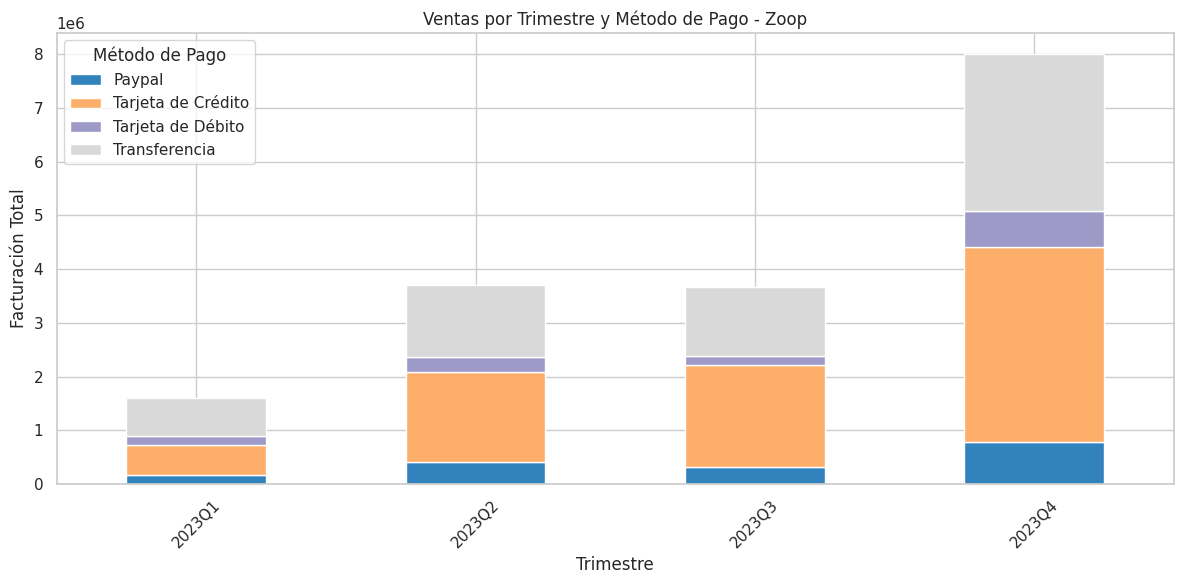

In [108]:
# Crear gr√°fico de barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')

# ventas_trimestre.plot(...): Llama al m√©todo plot() directamente sobre el DataFrame ventas_trimestre. Pandas DataFrames tienen un m√©todo plot integrado que usa Matplotlib por debajo para crear gr√°ficos r√°pidamente.
# kind='bar': Especifica que el tipo de gr√°fico que se va a crear es un gr√°fico de barras.
# stacked=True: Indica que las barras deben ser apiladas. En este caso, para cada trimestre, las barras de los diferentes m√©todos de pago se apilar√°n una encima de la otra para mostrar el total de facturaci√≥n por trimestre y la contribuci√≥n de cada m√©todo de pago a ese total.
# figsize=(12, 6): Establece el tama√±o de la figura del gr√°fico en 12 pulgadas de ancho por 6 pulgadas de alto.
# colormap='tab20c': Define el mapa de colores que se utilizar√° para las diferentes secciones apiladas de las barras (cada m√©todo de pago). 'tab20c' es un mapa de colores predefinido en Matplotlib.

plt.title('Ventas por Trimestre y M√©todo de Pago - Zoop') # A√±ade un t√≠tulo al gr√°fico.

plt.xlabel('Trimestre') # Establece la etiqueta para el eje x (horizontal).

plt.ylabel('Facturaci√≥n Total') # Establece la etiqueta para el eje y (vertical).

plt.xticks(rotation=45)
# plt.xticks(rotation=45): Rota las etiquetas en el eje x (los nombres de los trimestres) 45 grados.
# Esto es √∫til cuando las etiquetas son largas y podr√≠an superponerse si estuvieran horizontales.

plt.legend(title='M√©todo de Pago')
# Muestra la leyenda del gr√°fico, que identifica qu√© color corresponde a cada m√©todo de pago.
# title='M√©todo de Pago' establece el t√≠tulo de la leyenda.

plt.tight_layout()
# plt.tight_layout(): Ajusta autom√°ticamente los par√°metros de la subtrama para que el dise√±o sea ajustado,
# evitando que los elementos del gr√°fico (como etiquetas o t√≠tulos) se superpongan.

plt.show()# plt.show(): Muestra el gr√°fico generado.

<font color="7b71ff" size=4> Comentarios: </font>

---

El gr√°fico de columnas apiladas a√±ade a la comparaci√≥n entre per√≠odos o categor√≠as, la comparaci√≥n tambi√©n entre los datos de cada per√≠odo/categor√≠a. Es como si pusi√©ramos una "lupa" en cada columna y visualiz√°ramos la composici√≥n de cada una de acuerdo con la variable deseada (aqu√≠, las formas de pago).

Si√©ntete libre de formular algunas hip√≥tesis sobre las ventas por trimestre combinadas con el tipo de pago y qu√© ideas podemos obtener de esta base de datos.


## **3.1 - Componiendo datos est√°ticos**

---

Inicialmente, presentaremos un ejemplo de c√≥mo podemos utilizar la comparaci√≥n de datos est√°ticos, es decir, un recorte en el tiempo o de las variables que poseemos.

### **5¬™ Pregunta:** ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la proporci√≥n de usuarios(as) que est√°n participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [109]:
# Definici√≥n de colores de la paleta de Zoop
ROJO_1, ROJO_2, ROJO_3 = "#e23155",     "#cc2c4e", "#b32742"
AZUL_1, AZUL_2, AZUL_3 = "#203f75",     "#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,  GRIS_5 = "#ffffff", "#ebebeb",  "#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1, AQUA_2, AQUA_3 = "#addcd4",     "#9fccc5", "#96bfb9"

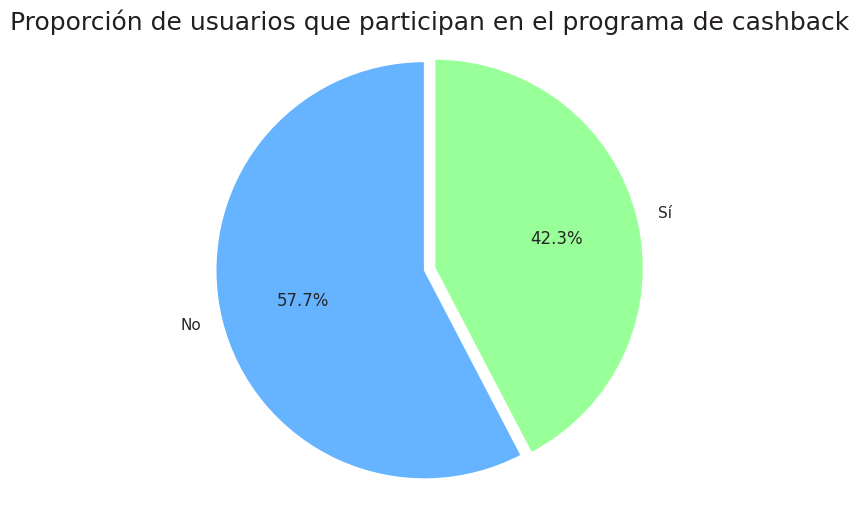

In [110]:
# Contar la cantidad de usuarios por participaci√≥n en cashback
# dfCompleto['cashback']: Selecciona la columna 'cashback' del DataFrame dfCompleto.
# .value_counts(): Este m√©todo cuenta cu√°ntas veces aparece cada valor √∫nico (S√≠ o No) en la columna 'cashback'.
cashback_counts = dfCompleto['cashback'].value_counts()

# Calcular la proporci√≥n
# cashback_counts: Es la Serie resultante de value_counts().
# / cashback_counts.sum(): Divide cada conteo por la suma total de conteos para obtener la proporci√≥n.
cashback_proporcion = cashback_counts / cashback_counts.sum()

# Mostrar la proporci√≥n (opcional)
# display(cashback_proporcion)

# Crear el gr√°fico de pastel (pie chart)
# plt.figure(figsize=(6, 6)): Crea una nueva figura para el gr√°fico con un tama√±o espec√≠fico (ancho, alto).
plt.figure(figsize=(6, 6))

# plt.pie(...): Genera el gr√°fico de pastel.
# cashback_proporcion: Son los valores que determinan el tama√±o de cada "rebanada" del pastel (las proporciones).
# labels=cashback_proporcion.index: Usa los nombres de las categor√≠as ('S√≠', 'No') como etiquetas para cada rebanada.
# autopct='%1.1f%%': Formatea los porcentajes que se muestran en el gr√°fico. '%1.1f%%' significa mostrar el porcentaje con un decimal seguido del signo %.
# colors=['#FF6666', '#66b3ff']: Define los colores para cada rebanada. Se usa una lista de c√≥digos hexadecimales.
# startangle=90: Rota el inicio del gr√°fico 90 grados (hace que la primera rebanada comience en la parte superior).
# explode=(0.05, 0): "Explota" (separa ligeramente) la primera rebanada para destacarla.
plt.pie(cashback_proporcion, labels=cashback_proporcion.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90, explode=(0.05, 0)),


# A√±adir t√≠tulo
# plt.title(...): A√±ade un t√≠tulo al gr√°fico. fontsize establece el tama√±o de la fuente.
plt.title('Proporci√≥n de usuarios que participan en el programa de cashback', fontsize=18, color=GRIS_5)

# Asegura que el gr√°fico sea un c√≠rculo (no ovalado)
# plt.axis('equal'): Ajusta los l√≠mites de los ejes para que el gr√°fico se vea como un c√≠rculo perfecto.
plt.axis('equal')

# Mostrar el gr√°fico
# plt.show(): Muestra el gr√°fico generado.
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øPodr√≠as utilizar el color rojo y mantener el azul y cambiar el gr√°fico anterior a uno tipo rosquilla?

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


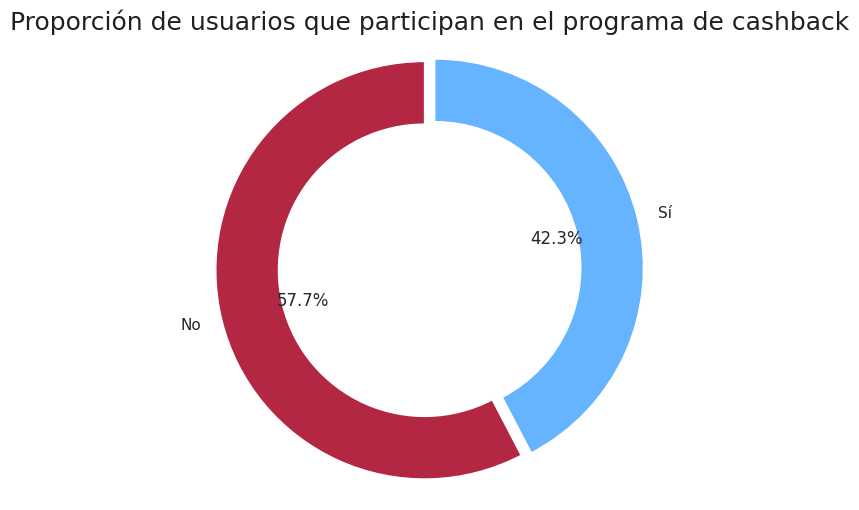

In [111]:
# Crear el gr√°fico de pastel (pie chart)
# plt.figure(figsize=(6, 6)): Crea una nueva figura para el gr√°fico con un tama√±o espec√≠fico (ancho, alto).
plt.figure(figsize=(6, 6))

# plt.pie(...): Genera el gr√°fico de pastel.
# cashback_proporcion: Son los valores que determinan el tama√±o de cada "rebanada" del pastel (las proporciones).
# labels=cashback_proporcion.index: Usa los nombres de las categor√≠as ('S√≠', 'No') como etiquetas para cada rebanada.
# autopct='%1.1f%%': Formatea los porcentajes que se muestran en el gr√°fico. '%1.1f%%' significa mostrar el porcentaje con un decimal seguido del signo %.
# colors=['#FF6666', '#66b3ff']: Define los colores para cada rebanada. Se usa una lista de c√≥digos hexadecimales.
# startangle=90: Rota el inicio del gr√°fico 90 grados (hace que la primera rebanada comience en la parte superior).
# explode=(0.05, 0): "Explota" (separa ligeramente) la primera rebanada para destacarla.
plt.pie(cashback_proporcion, labels=cashback_proporcion.index, autopct='%1.1f%%', colors=['#b32742',"#66b3ff"], startangle=90, explode=(0.05, 0), wedgeprops={'width': 0.3}),


# A√±adir t√≠tulo
# plt.title(...): A√±ade un t√≠tulo al gr√°fico. fontsize establece el tama√±o de la fuente.
plt.title('Proporci√≥n de usuarios que participan en el programa de cashback', fontsize=18, color=GRIS_5)

# Asegura que el gr√°fico sea un c√≠rculo (no ovalado)
# plt.axis('equal'): Ajusta los l√≠mites de los ejes para que el gr√°fico se vea como un c√≠rculo perfecto.
plt.axis('equal')

# Mostrar el gr√°fico
# plt.show(): Muestra el gr√°fico generado.
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Mira eso! Una vez m√°s, la IA nos present√≥ una buena idea de qu√© gr√°fico aplicar para este caso, pero ¬ønotaste que "ella" no tiene idea de los datos que poseemos?

Debemos estar atentos a esto, ya que solo le proporcionamos los nombres de las columnas y los datos que hab√≠a all√≠. La IA no puede saber si un valor es positivo o negativo, por ejemplo. Por eso, el "no" estaba en azul y el "s√≠" en verde. En el siguiente prompt, le indicamos que sustituyera el color verde por el rojo (sin mencionar el valor real de los datos) y pedimos una modificaci√≥n en el visual.

¬øQu√© tal si experimentas hacer otros pedidos y ves c√≥mo se comporta ChatGPT?

Hablando del gr√°fico, los gr√°ficos de sectores son ideales para pocas categor√≠as de datos, preferiblemente datos dicot√≥micos (2 categor√≠as, como s√≠ y no, gato y perro...). Representan la proporci√≥n de los datos de manera est√°tica.

## **3.2 - Distribuyendo Datos**

---


Con la ayuda de la IA, generaremos m√°s gr√°ficos que ser√°n importantes para la construcci√≥n del storytelling del informe de Zoop, seg√∫n lo solicitado. Ahora, partiendo de la distribuci√≥n de datos, vamos a analizar el perfil de los clientes y c√≥mo eval√∫an sus compras en Zoop.

### **6¬™ Pregunta:** ¬øC√≥mo est√°n distribuidas las calificaciones de la compra? ¬øTenemos buenos n√∫meros en general?  


Vamos a pedirle a ChatGPT que nos ayude a construir este visual. Veamos si esta IA puede representar estos datos con un visual adecuado.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de las evaluaciones del p√∫blico en relaci√≥n con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relaci√≥n con la compra que realizaron, que var√≠an de 0 a 10 en n√∫meros enteros.

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear este gr√°fico.


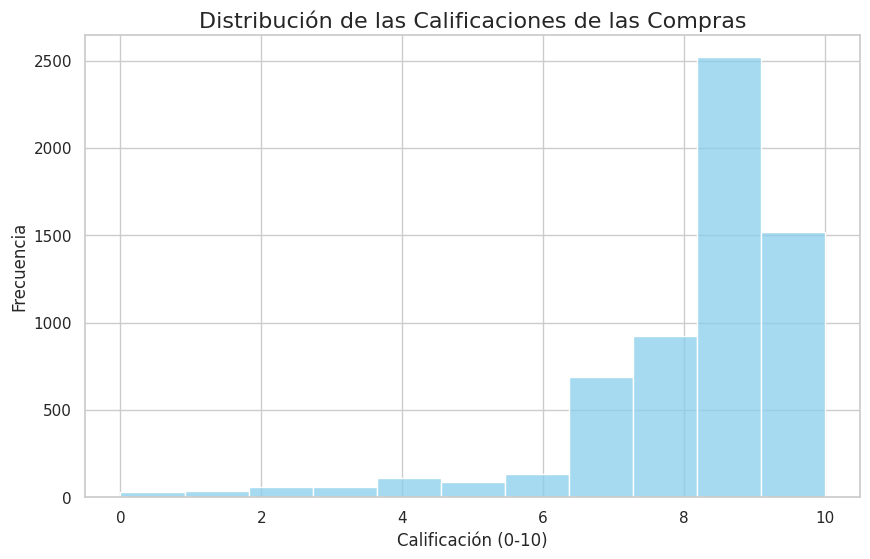

In [112]:
# Configurar el tama√±o del gr√°fico
# plt.figure(figsize=(10, 6)): Crea una nueva figura para el gr√°fico con un tama√±o espec√≠fico (ancho, alto) en pulgadas.
plt.figure(figsize=(10, 6))

# Crear el gr√°fico de distribuci√≥n (histograma)
# sns.histplot(...): Utiliza la funci√≥n histplot de Seaborn para crear un histograma.
# data=dfCompleto: Especifica el DataFrame que contiene los datos.
# x='nota': Especifica la columna del DataFrame cuyos valores se usar√°n para el histograma.
# bins=11: Define el n√∫mero de contenedores (barras) en el histograma. Con bins=11 y datos de 0 a 10, cada barra representar√° un valor entero.
# kde=False: Desactiva la estimaci√≥n de densidad del kernel (la l√≠nea curva que a veces acompa√±a al histograma).
# color='skyblue': Establece el color de las barras del histograma.
sns.histplot(data=dfCompleto, x='nota', bins=11, kde=False, color='skyblue')

# A√±adir etiquetas y t√≠tulo
# plt.title(...): A√±ade un t√≠tulo al gr√°fico. fontsize establece el tama√±o de la fuente.
plt.title('Distribuci√≥n de las Calificaciones de las Compras', fontsize=16)
# plt.xlabel(...): Establece la etiqueta para el eje x (horizontal).
plt.xlabel('Calificaci√≥n (0-10)', fontsize=12)
# plt.ylabel(...): Establece la etiqueta para el eje y (vertical).
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gr√°fico
# plt.show(): Muestra el gr√°fico generado.
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Una vez m√°s, no necesitamos especificar directamente el tipo de gr√°fico, ya que al mencionar la distribuci√≥n de valores num√©ricos de una simple columna, ChatGPT logr√≥ interpretar y proporcionar el c√≥digo para un histograma de columnas. Este gr√°fico es ideal para presentar la distribuci√≥n de una muestra de datos o poblaci√≥n. Cada columna aqu√≠ representa la frecuencia de repetici√≥n de un valor.

¬øTe gustar√≠a experimentar haciendo lo mismo solo con las edades?


### **7¬™ Pregunta:** ¬øC√≥mo est√° distribuida nuestra audiencia por edad y sexo biol√≥gico? ¬øExiste alg√∫n grupo que sobresalga?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de nuestra audiencia por edad y sexo biol√≥gico.

En "df", tenemos las columnas:
* edad: edad de la persona que realiz√≥ la compra
* sexo_biologico: sexo biol√≥gico de la persona que realiz√≥ la compra, con datos categ√≥ricos

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


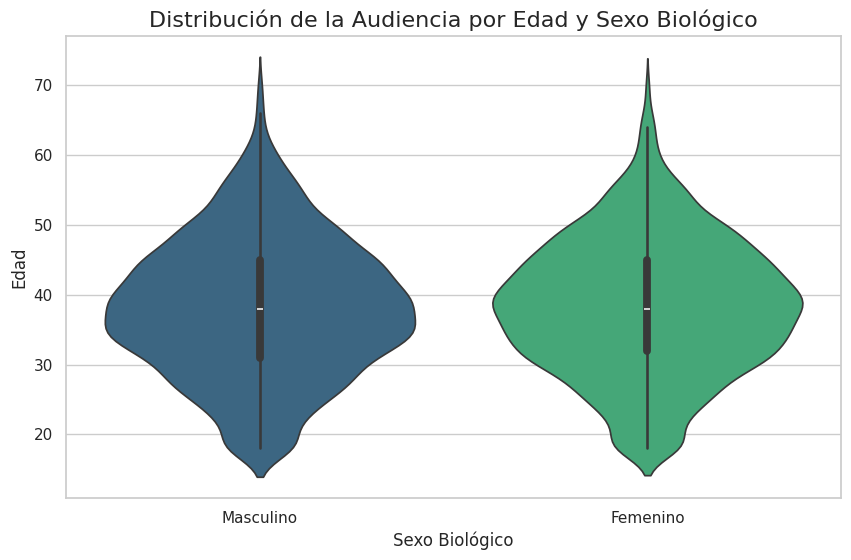

In [113]:
# Configurar el tama√±o del gr√°fico
# plt.figure(figsize=(10, 6)): Crea una nueva figura para el gr√°fico con un tama√±o espec√≠fico (ancho, alto) en pulgadas.
plt.figure(figsize=(10, 6))

# Crear el gr√°fico de viol√≠n
# sns.violinplot(...): Utiliza la funci√≥n violinplot de Seaborn para crear un gr√°fico de viol√≠n.
# data=dfCompleto: Especifica el DataFrame que contiene los datos.
# x='sexo_biologico': Especifica la columna categ√≥rica para el eje x.
# y='edad': Especifica la columna num√©rica para el eje y.
# palette='viridis': Define la paleta de colores a usar para las diferentes categor√≠as.
sns.violinplot(data=dfCompleto, x='sexo_biologico', y='edad', palette='viridis')

# A√±adir etiquetas y t√≠tulo
# plt.title(...): A√±ade un t√≠tulo al gr√°fico. fontsize establece el tama√±o de la fuente.
plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico', fontsize=16)
# plt.xlabel(...): Establece la etiqueta para el eje x (horizontal).
plt.xlabel('Sexo Biol√≥gico', fontsize=12)
# plt.ylabel(...): Establece la etiqueta para el eje y (vertical).
plt.ylabel('Edad', fontsize=12)

# Mostrar el gr√°fico
# plt.show(): Muestra el gr√°fico generado.
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
El gr√°fico generado es poco pr√°ctico, ya que compila los datos del sexo biol√≥gico 'Masculino' y 'Femenino' en el gr√°fico de viol√≠n. Necesitamos darle una instrucci√≥n adicional a GPT para elegir un visual m√°s adecuado.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Creo que podemos mejorar este gr√°fico. ¬øQu√© te parece cambiar a un boxplot?


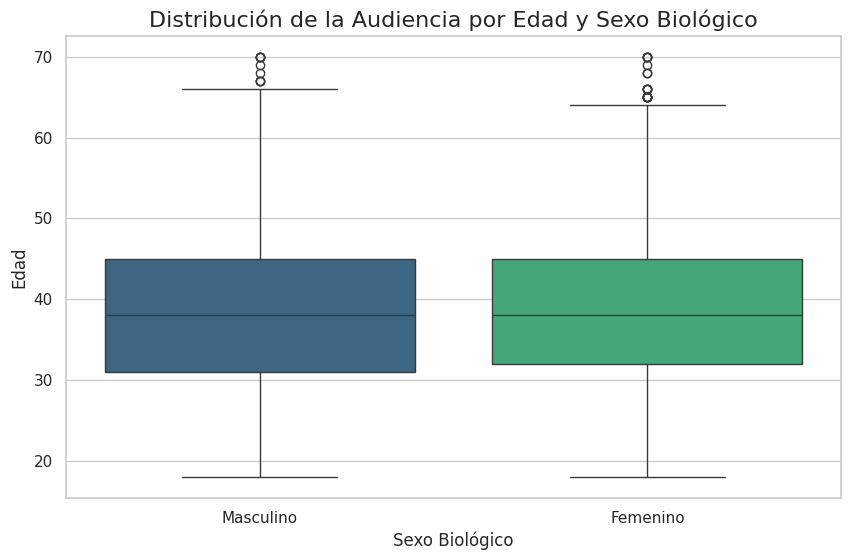

In [114]:
# Configurar el tama√±o del gr√°fico
# plt.figure(figsize=(10, 6)): Crea una nueva figura para el gr√°fico con un tama√±o espec√≠fico (ancho, alto) en pulgadas.
plt.figure(figsize=(10, 6))

# Crear el gr√°fico de boxplot
# sns.boxplot(...): Utiliza la funci√≥n boxplot de Seaborn para crear un gr√°fico de caja.
# data=dfCompleto: Especifica el DataFrame que contiene los datos.
# x='sexo_biologico': Especifica la columna categ√≥rica para el eje x.
# y='edad': Especifica la columna num√©rica para el eje y.
# palette='viridis': Define la paleta de colores a usar para las diferentes categor√≠as.
sns.boxplot(data=dfCompleto, x='sexo_biologico', y='edad', palette='viridis')

# A√±adir etiquetas y t√≠tulo
# plt.title(...): A√±ade un t√≠tulo al gr√°fico. fontsize establece el tama√±o de la fuente.
plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico', fontsize=16)
# plt.xlabel(...): Establece la etiqueta para el eje x (horizontal).
plt.xlabel('Sexo Biol√≥gico', fontsize=12)
# plt.ylabel(...): Establece la etiqueta para el eje y (vertical).
plt.ylabel('Edad', fontsize=12)

# Mostrar el gr√°fico
# plt.show(): Muestra el gr√°fico generado.
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Esta vez fue necesario guiar a la IA para generar una visualizaci√≥n mejor para nuestros an√°lisis.

El gr√°fico representado es un boxplot (diagrama de caja) que es ideal para representar un conjunto de datos de acuerdo con 5 medidas de inter√©s: valor m√°ximo, m√≠nimo, 1¬∫ cuartil (donde est√°n situados el 25% de los datos), 2¬∫ cuartil o mediana (donde est√°n situados el 50% de los datos) y 3¬∫ cuartil (donde est√°n situados el 75% de los datos).

¬øRecuerdas el `describe()`? Este gr√°fico presenta en un solo elemento gran parte de los datos que la funci√≥n muestra en tabla.

Concluimos la 1¬™ versi√≥n de los 7 visuales que utilizaremos en nuestro proyecto. Ahora, pasaremos a la aplicaci√≥n de las t√©cnicas de storytelling para mejorar los visuales y adaptarlos a la identidad visual de Zoop antes de la exportaci√≥n.


## **4.1 - Definiendo los colores del proyecto**

---


Ahora, vamos a explorar la importancia de los colores en la visualizaci√≥n de datos, discutir c√≥mo las personas perciben e interpretan la informaci√≥n visual, y abordar la diferencia entre la capacidad de la inteligencia artificial y la visi√≥n humana en lo que respecta a la elecci√≥n de colores y accesibilidad.



### Paleta de colores de Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta del proyecto

|Rojo|||
|------|------|------|
| Rojo_1 |Rojo_2 |Rojo_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [115]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***¬øPor qu√© definimos nosotros mismos los colores del proyecto?*** </font>


1. **Percepci√≥n humana de los colores:**

Nuestro cerebro interpreta los colores de manera √∫nica, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepci√≥n humana para asegurar que la informaci√≥n se transmita de manera clara y eficaz. Adem√°s de seguir la identidad visual de Zoop, es decir, dar esa sensaci√≥n de que el visual es de Zoop.

2. **Accesibilidad:**

Ciertas combinaciones de colores pueden ser dif√≠ciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aqu√≠ seguiremos algunas directrices y recomendaciones para crear gr√°ficos accesibles.

3. **IA vs. elecci√≥n de colores:**

Mientras que la IA puede realizar tareas complejas, como an√°lisis de datos y reconocimiento de patrones, a√∫n no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aqu√≠ es donde entra nuestra intervenci√≥n creativa y consideraci√≥n humana.

4. **Experiencia visual:**

¬øLas personas pueden entender la informaci√≥n transmitida por los gr√°ficos? ¬øExiste alg√∫n "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar t√©cnicas para mejorar la experiencia visual, como el contraste adecuado, la elecci√≥n cuidadosa de los colores de la paleta y el destaque de elementos clave.

¬øVamos ahora a sumergirnos en la pr√°ctica e incorporar estos conceptos a nuestro proyecto?


## **4.2 - A√±adiendo etiquetas y r√≥tulos**

Ya hemos creado anteriormente los 7 visuales y definido los colores del proyecto. Ahora, vamos a elegir solo uno de los visuales para comprender c√≥mo podemos utilizar la IA para agregar los colores ideales, las etiquetas de los datos, t√≠tulos y etiquetas de los ejes.

Entonces, tomaremos el c√≥digo de ese primer gr√°fico (M√©todos de pago utilizados) y exploraremos estos cambios a trav√©s de la utilizaci√≥n de la IA.

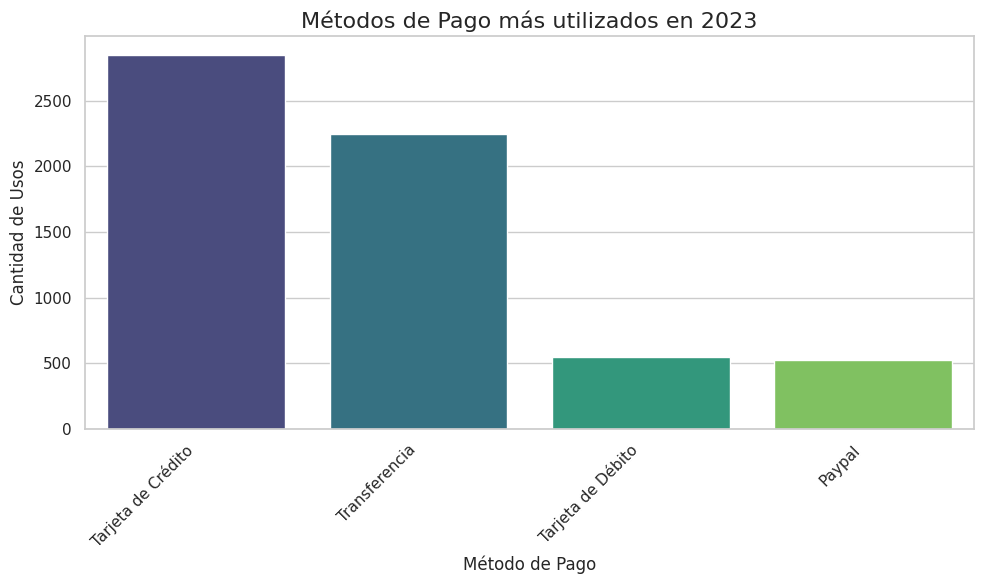

In [116]:
# Crear una visualizaci√≥n (gr√°fico de barras) para mostrar la cantidad de m√©todos de pago
plt.figure(figsize=(10, 6))
sns.barplot(x='metodo_pago', y='cantidad', data=metodosPago, palette='viridis')

# A√±adir etiquetas y t√≠tulo
plt.title('M√©todos de Pago m√°s utilizados en 2023', fontsize=16)
plt.xlabel('M√©todo de Pago', fontsize=12)
plt.ylabel('Cantidad de Usos', fontsize=12)

# Mostrar el gr√°fico
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor visualizaci√≥n si son largas
plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()

<strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora lleg√≥ el momento de refinar nuestras visualizaciones. Comencemos con el primer gr√°fico que hicimos, el de los m√©todos de pago.

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las columnas en el color ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "M√©todos de pago m√°s utilizados en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas as√≠ como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tama√±o 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gr√°fico deben ser suprimidos.

Adem√°s, es necesario mostrar el total de cada m√©todo de pago encima de cada columna, con el texto tambi√©n en el color AZUL_1 y tama√±o 12.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

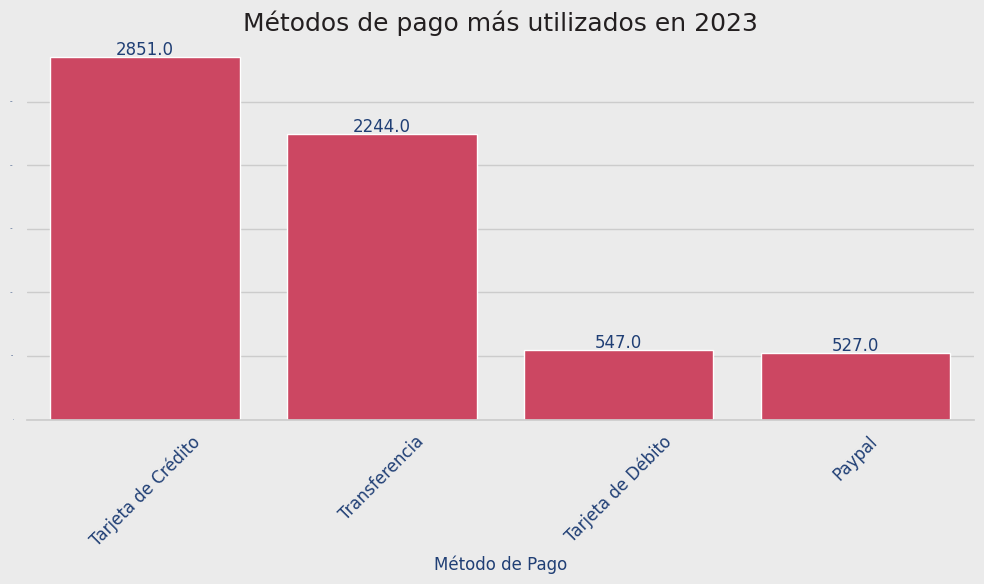

In [117]:
# Crear una visualizaci√≥n (gr√°fico de barras) para mostrar la cantidad de m√©todos de pago
plt.figure(figsize=(10, 6), facecolor=GRIS_1) # Establecer color de fondo de la figura
ax = sns.barplot(x='metodo_pago', y='cantidad', data=metodosPago, palette=[ROJO_1]) # Establecer color de las barras y obtener el objeto Axes

# Establecer color de fondo del gr√°fico
ax.set_facecolor(GRIS_1)

# A√±adir etiquetas y t√≠tulo
ax.set_title('M√©todos de pago m√°s utilizados en 2023', fontsize=18, color=GRIS_5) # T√≠tulo con color y tama√±o
ax.set_xlabel('M√©todo de Pago', fontsize=12, color=AZUL_1) # Etiqueta del eje x con color y tama√±o
ax.set_ylabel('') # Suprimir etiqueta del eje y
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1, rotation=45) # Etiquetas del eje x con color, tama√±o y rotaci√≥n
ax.tick_params(axis='y', labelsize=0, colors=AZUL_1) # Suprimir etiquetas del eje y

# Suprimir bordes del gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False) # No suprimir el borde inferior para que las etiquetas se vean

# A√±adir el total encima de cada columna
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=12, color=AZUL_1)

# Mostrar el gr√°fico
plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
¬°Vaya! Parece otro gr√°fico, ¬øverdad?

Eliminamos muchos elementos distractores y a√±adimos solo la informaci√≥n que nos interesaba. Adem√°s, cambiamos el dise√±o de un estado gen√©rico a un formato que se ajusta a la identidad de Zoop, dejando nuestro gr√°fico listo para ser utilizado, por ejemplo, en el informe de ventas.

M√°s adelante aplicaremos estas acciones a los otros visuales. Nuestro enfoque aqu√≠ es entender las t√©cnicas de storytelling y c√≥mo combinarlas con la IA puede ser bastante √∫til.


## **4.3 - A√±adiendo textos**

---


Ya hemos refinado uno de los gr√°ficos en la etapa anterior. Ahora, vamos a traer ese gr√°fico, a√±adiendo un elemento m√°s que puede ser importante para los an√°lisis: textos informativos. Utilizaremos la IA nuevamente para este proceso.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°El gr√°fico qued√≥ muy bien!

Ahora quiero a√±adir un texto dentro del √°rea del gr√°fico, ¬øvamos all√°?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posici√≥n x=1.5 y y=2500, a√±ade el siguiente texto con tama√±o 10 y color AZUL_3: f"$\\bf{porcentaje:.2f}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \npara el pago. Ser√≠a interesante considerar asociaciones con \nbancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \na nuestra clientela.".

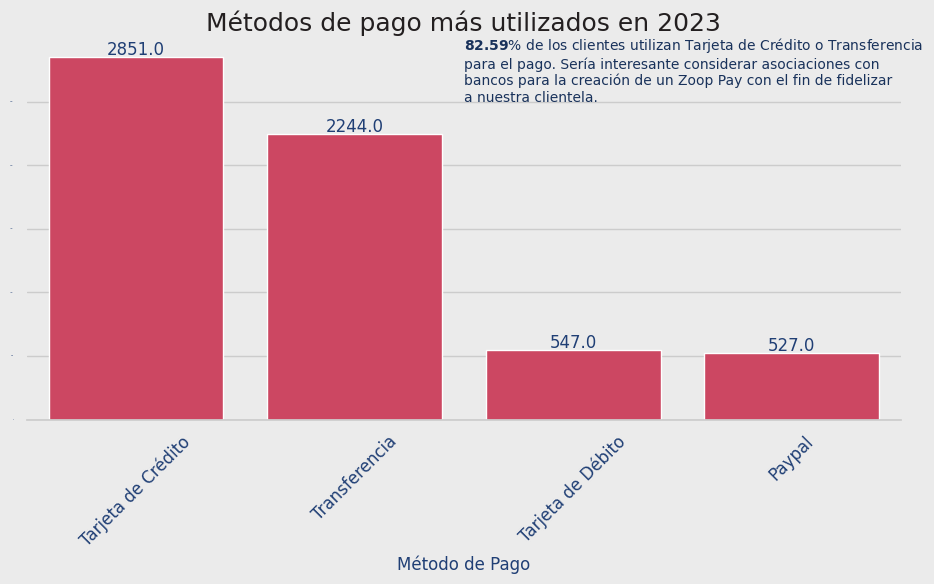

In [118]:
# Crear una visualizaci√≥n (gr√°fico de barras) para mostrar la cantidad de m√©todos de pago
plt.figure(figsize=(10, 6), facecolor=GRIS_1) # Establecer color de fondo de la figura
ax = sns.barplot(x='metodo_pago', y='cantidad', data=metodosPago, palette=[ROJO_1]) # Establecer color de las barras y obtener el objeto Axes

# Establecer color de fondo del gr√°fico
ax.set_facecolor(GRIS_1)

# A√±adir etiquetas y t√≠tulo
ax.set_title('M√©todos de pago m√°s utilizados en 2023', fontsize=18, color=GRIS_5) # T√≠tulo con color y tama√±o
ax.set_xlabel('M√©todo de Pago', fontsize=12, color=AZUL_1) # Etiqueta del eje x con color y tama√±o
ax.set_ylabel('') # Suprimir etiqueta del eje y
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1, rotation=45) # Etiquetas del eje x con color, tama√±o y rotaci√≥n
ax.tick_params(axis='y', labelsize=0, colors=AZUL_1) # Suprimir etiquetas del eje y

# Suprimir bordes del gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False) # No suprimir el borde inferior para que las etiquetas se vean

# A√±adir el total encima de cada columna
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=12, color=AZUL_1)

# Calcular el porcentaje de los dos primeros m√©todos de pago
total_ventas = metodosPago['cantidad'].sum()
porcentaje = (metodosPago['cantidad'].iloc[0] + metodosPago['cantidad'].iloc[1]) / total_ventas * 100

# A√±adir el texto informativo dentro del gr√°fico
texto_anotacion = f"$\\bf{porcentaje:.2f}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \npara el pago. Ser√≠a interesante considerar asociaciones con \nbancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \na nuestra clientela."
ax.annotate(texto_anotacion, xy=(1.5, 2500), fontsize=10, color=AZUL_3)


# Mostrar el gr√°fico
plt.tight_layout() # Ajustar el layout para evitar solapamiento
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aprovechamos el √°rea √∫til para presentar una *idea* que tuvimos al describir los datos de los m√©todos de pago. Esto aumenta significativamente la relevancia de los datos representados y proporciona m√°s informaci√≥n a quien lo lee.


## **4.4 - Agregar elementos visuales**

---


¬øQu√© tal el uso de textos informativos, verdad? ¬øY si ahora a√±adimos otros elementos visuales a uno de nuestros gr√°ficos?

Vamos a elegir ahora el gr√°fico de l√≠neas (Ventas totales mensuales de Zoop) y aplicar una t√©cnica m√°s a √©l mediante el uso de la IA.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øVamos a explorar otro de los gr√°ficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:
```
ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
```
Pero debes sustituirla por:
```
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
```
En el que `df['fecha']` corresponde a las fechas en formato datetime y `df['facturacion']` a los valores de las ventas.

Y lo que gener√≥ el gr√°fico original fue:

```
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
```
Pero debes utilizar √∫nicamente la biblioteca matplotlib con la creaci√≥n del gr√°fico siguiendo este ejemplo:

```
plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en color GRIS_1, la l√≠nea en color AZUL_1 y el tama√±o de la figura debe ser de (12, 6).

El t√≠tulo de la figura es "Ventas totales mensuales en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tama√±o 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tama√±o 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gr√°fico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.


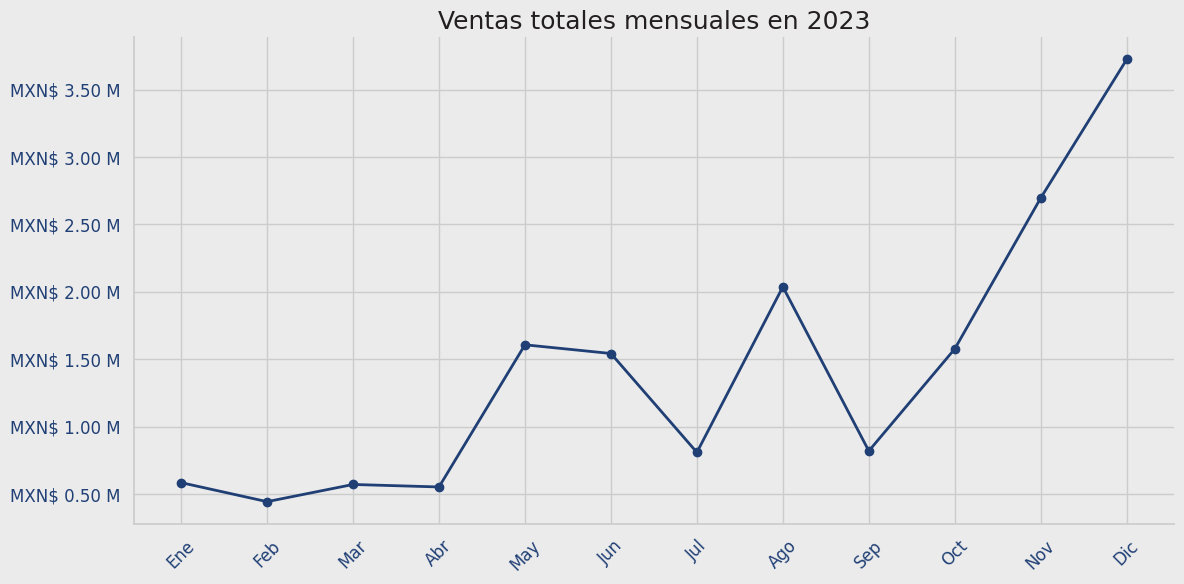

In [119]:
# Importaci√≥n de bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de traducci√≥n de meses
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Asegurar que 'fecha' est√© en formato datetime
dfCompleto['fecha'] = pd.to_datetime(dfCompleto['fecha'])

# Nueva forma de agregar datos por mes y reindexar
dfCompleto['mes'] = dfCompleto['fecha'].dt.strftime('%B')
ventas_mensuales = dfCompleto.groupby('mes')['facturacion'].sum().reindex(meses.keys())

# Crear la figura y los ejes
plt.figure(figsize=(12, 6), facecolor=GRIS_1)
ax = plt.gca() # Obtener los ejes actuales

# Establecer color de fondo del gr√°fico
ax.set_facecolor(GRIS_1)

# Crear el gr√°fico de l√≠neas usando plt.plot
ax.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color=AZUL_1, linewidth=2)

# A√±adir t√≠tulo
ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)

# Suprimir labels de los ejes
ax.set_xlabel('')
ax.set_ylabel('')

# Ajustar etiquetas del eje x
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1, rotation=45)
ax.set_xticklabels([meses[tick.get_text()] for tick in ax.get_xticklabels()]) # Usar las abreviaciones de meses

# Ajustar etiquetas del eje y
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'MXN$ {x/1000000:.2f} M')) # Formato "MXN$ valor M"

# Suprimir bordes del gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False) # Mantener el borde izquierdo para las etiquetas del eje y
# ax.spines['bottom'].set_visible(False) # Mantener el borde inferior para las etiquetas del eje x

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°Genial! Ahora que nuestro gr√°fico ya tiene la identidad visual, vamos a a√±adir algunos elementos visuales adicionales.

Dibuja 4 c√≠rculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5¬∫, 8¬∫, 11¬∫ y 12¬∫ puntos, respectivamente. A la izquierda de cada c√≠rculo enumera del 1 al 4.


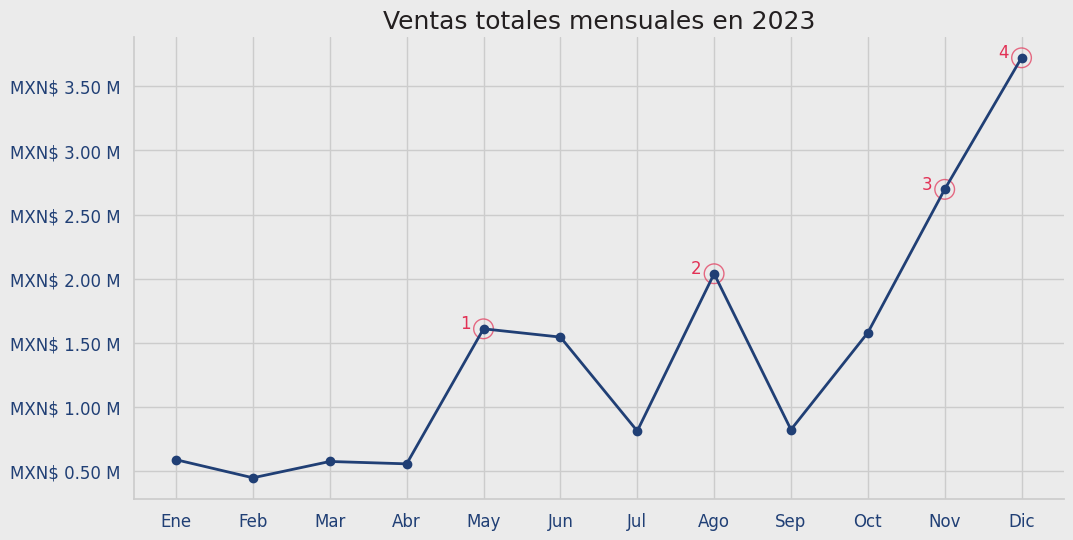

In [120]:
# Aseg√∫rate de que la columna 'fecha' est√© en formato datetime
dfCompleto['fecha'] = pd.to_datetime(dfCompleto['fecha'])

# Calcular la facturaci√≥n
dfCompleto['facturacion'] = dfCompleto['precio_unitario'] * dfCompleto['cantidad'] + dfCompleto['envio']

# Crear una columna 'mes' con el nombre del mes
dfCompleto['mes'] = dfCompleto['fecha'].dt.strftime('%B')

# Agrupar por mes y calcular la facturaci√≥n total
ventas_mensuales = dfCompleto.groupby('mes')['facturacion'].sum().reindex(meses.keys())

# Crear la figura y los ejes con fondo de color GRIS_1
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)  # GRIS_1
ax.set_facecolor(GRIS_1)  # GRIS_1

# Crear el gr√°fico de l√≠neas
ax.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color=AZUL_1, linewidth=2)  # AZUL_1

# Configurar el t√≠tulo
ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)  # GRIS_5

# Configurar etiquetas del eje x
ax.set_xticks(ventas_mensuales.index)
ax.set_xticklabels(ventas_mensuales.index, fontsize=12, color=AZUL_1)  # AZUL_1

# Configurar etiquetas del eje y
ax.set_ylabel('')
ax.set_yticklabels([f'MXN$ {x/1e6 :,.2f} M' for x in ax.get_yticks()], fontsize=12, color=AZUL_1)  # AZUL_1

# Suprimir etiquetas del eje x
ax.set_xlabel('')

# Configuraciones adicionales
plt.xticks(ventas_mensuales.index, [meses[mes] for mes in ventas_mensuales.index], fontsize=12, color=AZUL_1)

# Suprimir bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# A√±adir c√≠rculos numerados
for i, point in enumerate([(4, ventas_mensuales.iloc[4]), (7, ventas_mensuales.iloc[7]), (10, ventas_mensuales.iloc[10]), (11, ventas_mensuales.iloc[11])], start=1):
    plt.scatter(point[0], point[1], s=200, color='none', edgecolors=ROJO_1, alpha=0.7)
    plt.text(point[0] - 0.3, point[1] + 0.1, str(i), fontsize=12, color=ROJO_1)

# Mostrar el gr√°fico
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos a√±adido 4 c√≠rculos que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hip√≥tesis:

1. En mayo, tenemos una de las fechas m√°s relevantes en ventas: el D√≠a de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
2. En agosto, hay una situaci√≥n que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
3. En noviembre, destaca la Black Friday, uno de los principales per√≠odos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
4. En diciembre, tenemos  las festividades de A√±o Nuevo, consideradas el per√≠odo de mayores ventas no solo para Zoop, sino para el comercio minorista en general.

La recomendaci√≥n es investigar m√°s a fondo los datos y llegar a tus propias conclusiones.


Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, vamos a hacer una peque√±a modificaci√≥n en los 2 primeros, convirti√©ndolos en funciones, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n


# **Clase 5 - Finalizando el proyecto**

Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, haremos una peque√±a modificaci√≥n en los 2 primeros pas√°ndolos a funci√≥n, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n de los visuales.


### **Gr√°fico 1 - M√©todos de pago m√°s utilizados en 2023:**

In [121]:
def metodoPago():

  # Crear una visualizaci√≥n (gr√°fico de barras) para mostrar la cantidad de m√©todos de pago
  plt.figure(figsize=(10, 6), facecolor=GRIS_1) # Establecer color de fondo de la figura
  ax = sns.barplot(x='metodo_pago', y='cantidad', data=metodosPago, palette=[ROJO_1]) # Establecer color de las barras y obtener el objeto Axes

  # Establecer color de fondo del gr√°fico
  ax.set_facecolor(GRIS_1)

  # A√±adir etiquetas y t√≠tulo
  ax.set_title('M√©todos de pago m√°s utilizados en 2023', fontsize=18, color=GRIS_5) # T√≠tulo con color y tama√±o
  ax.set_xlabel('M√©todo de Pago', fontsize=12, color=AZUL_1) # Etiqueta del eje x con color y tama√±o
  ax.set_ylabel('') # Suprimir etiqueta del eje y
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1, rotation=45) # Etiquetas del eje x con color, tama√±o y rotaci√≥n
  ax.tick_params(axis='y', labelsize=0, colors=AZUL_1) # Suprimir etiquetas del eje y

  # Suprimir bordes del gr√°fico
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  # ax.spines['bottom'].set_visible(False) # No suprimir el borde inferior para que las etiquetas se vean

  # A√±adir el total encima de cada columna
  for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                  fontsize=12, color=AZUL_1)

  # Calcular el porcentaje de los dos primeros m√©todos de pago
  total_ventas = metodosPago['cantidad'].sum()
  porcentaje = (metodosPago['cantidad'].iloc[0] + metodosPago['cantidad'].iloc[1]) / total_ventas * 100

  # A√±adir el texto informativo dentro del gr√°fico
  texto_anotacion = f"$\\bf{porcentaje:.2f}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \npara el pago. Ser√≠a interesante considerar asociaciones con \nbancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \na nuestra clientela."
  ax.annotate(texto_anotacion, xy=(1.5, 2500), fontsize=10, color=AZUL_3)


  # Mostrar el gr√°fico
  plt.tight_layout() # Ajustar el layout para evitar solapamiento
  return plt

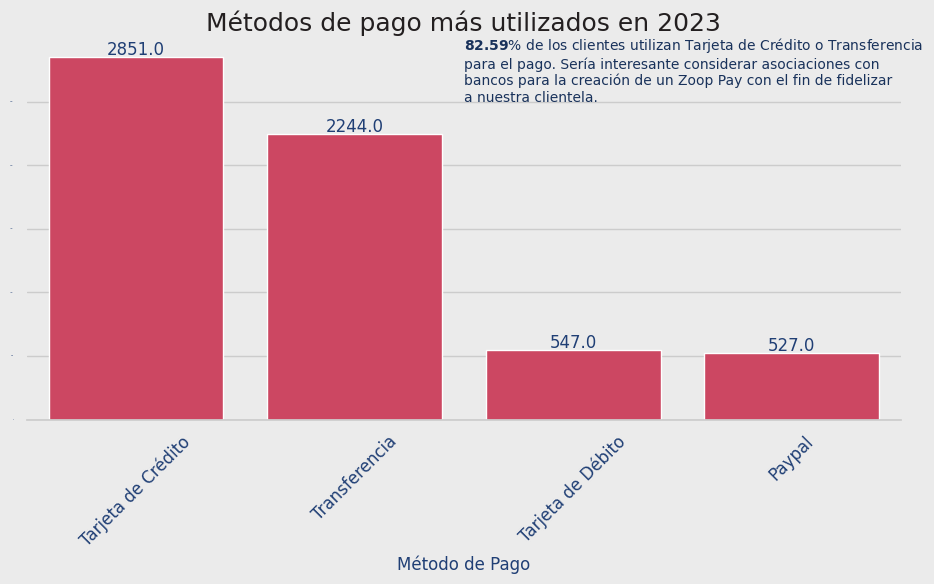

In [122]:
metodoPago().show()

### **Gr√°fico 2 - Total de ventas mensuales en 2023:**

In [123]:
def ventasMensuales():

  # Aseg√∫rate de que la columna 'fecha' est√© en formato datetime
  dfCompleto['fecha'] = pd.to_datetime(dfCompleto['fecha'])

  # Calcular la facturaci√≥n
  dfCompleto['facturacion'] = dfCompleto['precio_unitario'] * dfCompleto['cantidad'] + dfCompleto['envio']

  # Crear una columna 'mes' con el nombre del mes
  dfCompleto['mes'] = dfCompleto['fecha'].dt.strftime('%B')

  # Agrupar por mes y calcular la facturaci√≥n total
  ventas_mensuales = dfCompleto.groupby('mes')['facturacion'].sum().reindex(meses.keys())

  # Crear la figura y los ejes con fondo de color GRIS_1
  fig, ax = plt.subplots(figsize=(12, 6))
  fig.patch.set_facecolor(GRIS_1)  # GRIS_1
  ax.set_facecolor(GRIS_1)  # GRIS_1

  # Crear el gr√°fico de l√≠neas
  ax.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color=AZUL_1, linewidth=2)  # AZUL_1

  # Configurar el t√≠tulo
  ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)  # GRIS_5

  # Configurar etiquetas del eje x
  ax.set_xticks(ventas_mensuales.index)
  ax.set_xticklabels(ventas_mensuales.index, fontsize=12, color=AZUL_1)  # AZUL_1

  # Configurar etiquetas del eje y
  ax.set_ylabel('')
  ax.set_yticklabels([f'MXN$ {x/1e6 :,.2f} M' for x in ax.get_yticks()], fontsize=12, color=AZUL_1)  # AZUL_1

  # Suprimir etiquetas del eje x
  ax.set_xlabel('')

  # Configuraciones adicionales
  plt.xticks(ventas_mensuales.index, [meses[mes] for mes in ventas_mensuales.index], fontsize=12, color=AZUL_1)

  # Suprimir bordes superior y derecho
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # A√±adir c√≠rculos numerados
  for i, point in enumerate([(4, ventas_mensuales.iloc[4]), (7, ventas_mensuales.iloc[7]), (10, ventas_mensuales.iloc[10]), (11, ventas_mensuales.iloc[11])], start=1):
      plt.scatter(point[0], point[1], s=200, color='none', edgecolors=ROJO_1, alpha=0.7)
      plt.text(point[0] - 0.3, point[1] + 0.1, str(i), fontsize=12, color=ROJO_1)

  # Mostrar el gr√°fico
  return plt

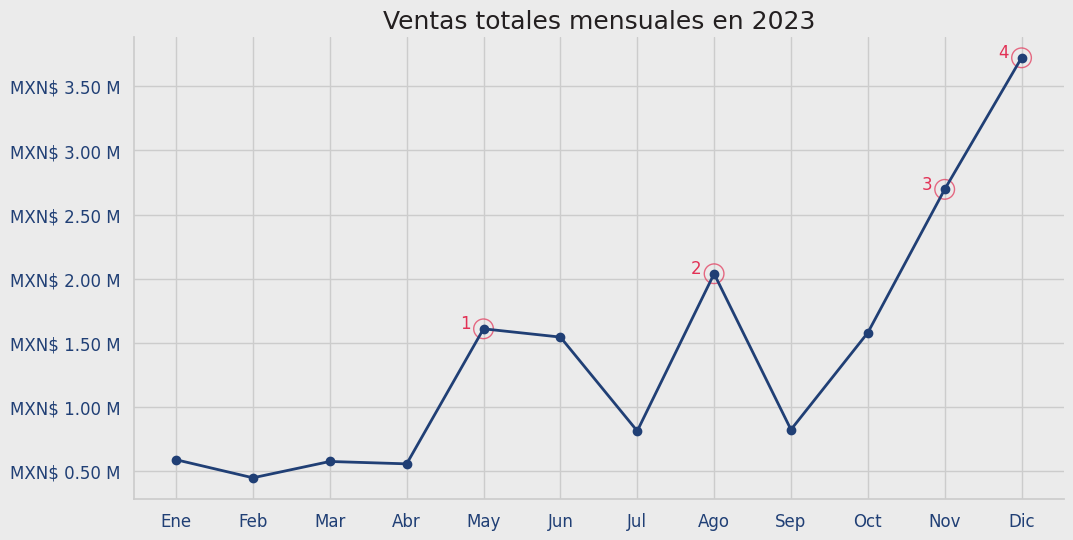

In [124]:
ventasMensuales().show()

Ahora que guardamos los 2 primeros gr√°ficos en funci√≥n, vamos a modificar uno m√°s, **Facturaci√≥n por categor√≠a de producto en 2023**, utilizando las t√©cnicas de storytelling que ya hemos aprendido.


### **Gr√°fico 3 - Facturaci√≥n por categor√≠a de producto en 2023:**


Vamos a continuar con los gr√°ficos generados a lo largo de las clases, partiendo ahora del gr√°fico de facturaci√≥n por categor√≠a de producto aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

¬øVamos a proceder con otro gr√°fico? Ahora, vamos refinar el gr√°fico de facturaci√≥n por categor√≠a. Recuerda que este gr√°fico fue de barras horizontales.

El script original del gr√°fico es el siguiente:

```python


dfCompleto['facturacion'] = dfCompleto['precio_unitario'] * dfCompleto['cantidad'] + dfCompleto['envio']


facturacion_categoria = dfCompleto.groupby('categoria')['facturacion'].sum().reset_index().sort_values(by='facturacion', ascending=False)

# Crear gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
# facturacion_categoria.plot(kind='barh', color='mediumseagreen')
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis', orient='h')
plt.xlabel('Facturaci√≥n Total')
plt.ylabel('Categor√≠a de Producto')
plt.title('Facturaci√≥n por categor√≠a de producto en 2023')
plt.tight_layout()
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las barras en el color AQUA_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben ser suprimidas al igual que los labels de los ejes x y y (xlabel y ylabel), y las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1. Todas las bordes del gr√°fico deben ser suprimidas.

Mostrar el total de la facturaci√≥n de cada categor√≠a al lado derecho de cada barra, con el texto en color AZUL_1 y tama√±o 12.

Agregar un texto dentro del √°rea del gr√°fico. Divide el valor de la 1¬™ barra entre la suma de todas las barras y convi√©rtelo en un porcentaje, almacen√°ndolo en la variable "porcentaje".

Ahora, en la posici√≥n x = 0.4e7 y y = 5, agrega el siguiente texto con tama√±o 12 y color AZUL_3: `f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\nEsto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\npresentes en el portafolio de Zoop."`.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python.


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

def facturacionCategoria():

  # Aseg√∫rate de que la columna 'fecha' est√© en formato datetime
  dfCompleto['fecha'] = pd.to_datetime(dfCompleto['fecha'])
  # Aseg√∫rate de tener las columnas necesarias en dfCompleto
  # Calcular la facturaci√≥n: (precio_unitario * cantidad) + envio
  dfCompleto['facturacion'] = dfCompleto['precio_unitario'] * dfCompleto['cantidad'] + dfCompleto['envio']

  # Agrupar por categor√≠a y sumar la facturaci√≥n
  # facturacion_categoria = dfCompleto.groupby('categoria')['facturacion'].sum().sort_values()
  facturacion_categoria = dfCompleto.groupby('categoria')['facturacion'].sum().reset_index().sort_values(by='facturacion', ascending=False)

  # Crear gr√°fico de barras horizontales
  plt.figure(figsize=(10, 6), facecolor=GRIS_1) # Establecer color de fondo de la figura
  ax = sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette=[AQUA_1], orient='h') # Establecer color de las barras y obtener el objeto Axes

  # Establecer color de fondo del gr√°fico
  ax.set_facecolor(GRIS_1)

  # A√±adir t√≠tulo
  ax.set_title('Facturaci√≥n por categor√≠a de producto en 2023', fontsize=18, color=GRIS_5) # T√≠tulo con color y tama√±o

  # Suprimir labels de los ejes
  ax.set_xlabel('')
  ax.set_ylabel('')

  # Ajustar etiquetas del eje x (suprimir)
  ax.tick_params(axis='x', labelsize=0)

  # Ajustar etiquetas del eje y
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # Suprimir bordes del gr√°fico
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  # A√±adir el total de facturaci√≥n al lado derecho de cada barra
  for p in ax.patches:
      ax.annotate(f'{p.get_width():,.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                  ha='left', va='center', xytext=(5, 0), textcoords='offset points',
                  fontsize=12, color=AZUL_1)

  # Calcular el porcentaje de la primera barra (Electr√≥nica)
  total_facturacion = facturacion_categoria['facturacion'].sum()
  porcentaje_electronica = (facturacion_categoria['facturacion'].iloc[0] / total_facturacion) * 100

  # Agregar texto informativo dentro del √°rea del gr√°fico
  texto_anotacion = f"$\\bf{porcentaje_electronica:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\nEsto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\npresentes en el portafolio de Zoop."
  ax.annotate(texto_anotacion, xy=(0.4e7, 5), fontsize=12, color=AZUL_3)


  # Mostrar el gr√°fico
  plt.tight_layout()
  return plt

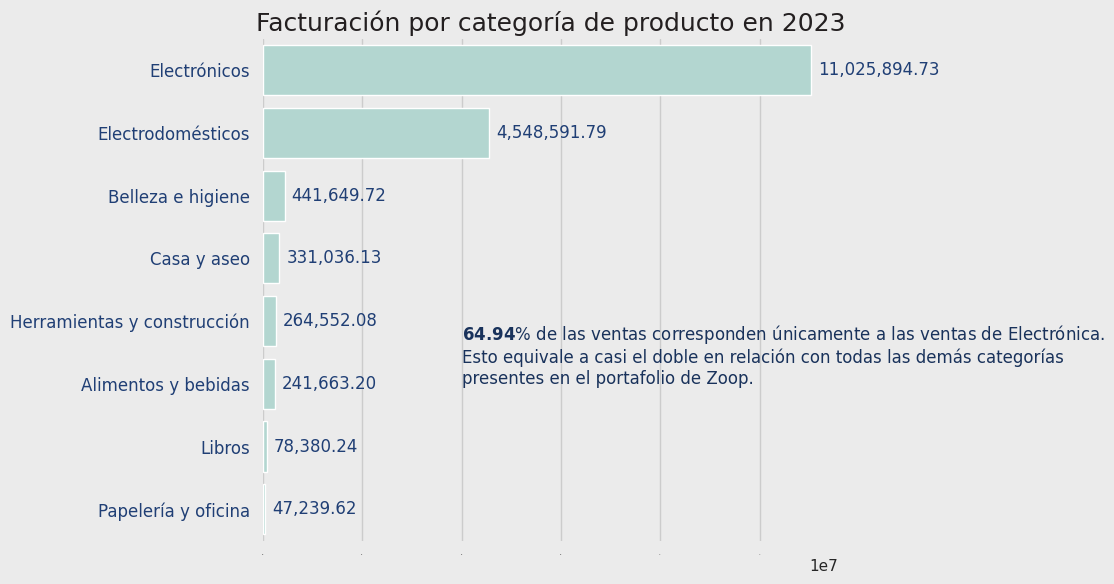

In [130]:
facturacionCategoria().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hicimos con un solo prompt la inserci√≥n de las etiquetas, la modificaci√≥n de los colores y a√±adimos un texto explicativo. Con la secuencia de explicaciones para ChatGPT, este reconoce algunos patrones en la construcci√≥n y genera parte del c√≥digo incluso sin m√°s detalles.


## **5.2 - Ajustando los visuales de composici√≥n**

---


Ya hemos llegado a pr√°cticamente la mitad de los gr√°ficos refinados. Ahora, en este tema, ajustaremos 2 m√°s aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


### **Gr√°fico 4 - Ventas por trimestre y m√©todo de pago:**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de Ventas por Trimestre y M√©todo de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

El script original del gr√°fico es el siguiente:
```python

ventas_trimestre.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.title('Ventas por Trimestre y M√©todo de Pago - Zoop')
plt.xlabel('Trimestre')
plt.ylabel('Facturaci√≥n Total') (vertical).
plt.xticks(rotation=45)
plt.legend(title='M√©todo de Pago')
plt.tight_layout()

plt.show()

```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1 y el tama√±o de la figura debe ser de (10, 6). La secuencia de colores de las columnas apiladas (palette) es [BLANCO, GRIS_3, GRIS_1, GRIS_3].

El t√≠tulo de la figura es "Ventas por Trimestre y M√©todo de Pago en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar a 0 grados y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben estar en el formato f"MXN$ valor M" sin decimales y las etiquetas de los ejes x e y (xlabel e ylabel) deben ser suprimidas. Todos los bordes del gr√°fico deben ser suprimidos(['top','bottom','left','right]).

Tambi√©n agrega una cuadr√≠cula punteada en y.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python.

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

def ventasTrimestre():

  # Aseg√∫rate de que la columna 'fecha' est√© en formato datetime
  dfCompleto['fecha'] = pd.to_datetime(dfCompleto['fecha'])
  # Crear gr√°fico de barras apiladas
  fig, ax = plt.subplots(figsize=(10, 6)) # Crear figura con el tama√±o y obtener los ejes
  fig.patch.set_facecolor(GRIS_1) # Establecer color de fondo de la figura
  ax.set_facecolor(GRIS_1) # Establecer color de fondo del gr√°fico

  # ventas_trimestre.plot(kind='bar', stacked=True, ax=ax, palette=[BLANCO, GRIS_3, GRIS_1, GRIS_3]) # Usar los ejes creados y definir la paleta
  ventas_trimestre.plot(kind='bar', stacked=True, ax=ax, color=[BLANCO, GRIS_3, AQUA_1, AQUA_3]) # Usar los ejes creados y definir la paleta con 'color'

  # A√±adir t√≠tulo
  ax.set_title('Ventas por Trimestre y M√©todo de Pago en 2023', fontsize=18, color=GRIS_5)

  # Suprimir labels de los ejes
  ax.set_xlabel('')
  ax.set_ylabel('')

  # Ajustar etiquetas del eje x
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1, rotation=0)

  # Ajustar etiquetas del eje y
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)
  ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'MXN$ {x/1000000:.0f} M')) # Formato "MXN$ valor M" sin decimales

  # Suprimir bordes del gr√°fico
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  # Agregar cuadr√≠cula punteada en y
  ax.yaxis.grid(True, linestyle='--', alpha=0.7)
  ax.set_axisbelow(True) # Colocar la cuadr√≠cula detr√°s de las barras

  # Configurar leyenda
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, labels, title='M√©todo de Pago')


  plt.tight_layout()
  return plt

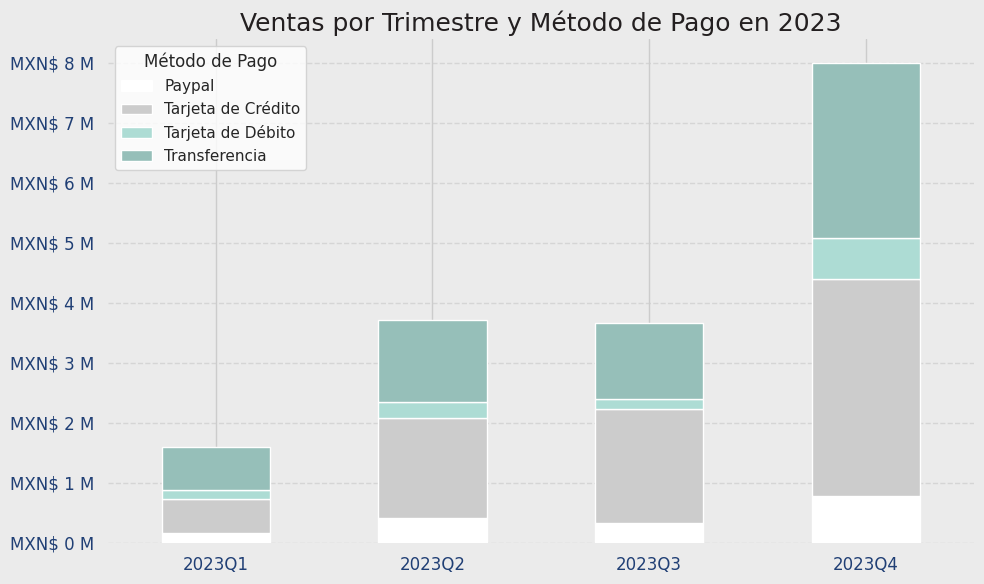

In [136]:
ventasTrimestre().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Ajustamos el gr√°fico de barras apiladas representando con colores m√°s suaves los valores de los m√©todos de pago. Podemos notar cosas interesantes en este gr√°fico, como: el 2¬∫ y 4¬∫ trimestre siendo los momentos en que Zoop factura m√°s con ventas, y tambi√©n el aumento en los pagos de las compras realizadas por los clientes mediante tarjeta de cr√©dito.


### **Gr√°fico 5 - Clientes participantes del programa de cashback:**

Ahora ha llegado el momento del gr√°fico de sectores. Ya est√° bien encaminado, pero necesitamos realizar algunos ajustes.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora, vamos a refinar el gr√°fico de dona que produjimos para la proporci√≥n de usuarios que se adhieren al programa de cashback.

Recuerda que el script original del gr√°fico es el siguiente:

```python
# Crear el gr√°fico de pastel (pie chart)
plt.figure(figsize=(6, 6))

plt.pie(cashback_proporcion, labels=cashback_proporcion.index, autopct='%1.1f%%', colors=['#b32742',"#66b3ff"], startangle=90, explode=(0.05, 0), wedgeprops={'width': 0.3}),

plt.title('Proporci√≥n de usuarios que participan en el programa de cashback', fontsize=18, color=GRIS_5)

plt.axis('equal')


plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de la porci√≥n de valor "No" igual a GRIS_3, el color de la porci√≥n de valor "S√≠" igual a AZUL_1 y el tama√±o de la figura debe ser de (6, 6).

El t√≠tulo de la figura es "¬øParticipan en el programa de cashback?" con un tama√±o de 18 y su color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tama√±o de 12, y los porcentajes deben estar en color BLANCO, tambi√©n con un tama√±o de 12.

La propiedad de ancho de la dona (`wedgeprops`) debe ser de 0.4, la posici√≥n de los porcentajes dentro de la porci√≥n (`pctdistance`) debe ser de 0.8, el √°ngulo de inicio debe ser de 180 (`startangle`), y sin explosi√≥n de porciones.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [139]:
def cashback():

  # Contar la cantidad de usuarios por participaci√≥n en cashback
  # dfCompleto['cashback']: Selecciona la columna 'cashback' del DataFrame dfCompleto.
  # .value_counts(): Este m√©todo cuenta cu√°ntas veces aparece cada valor √∫nico (S√≠ o No) en la columna 'cashback'.
  cashback_counts = dfCompleto['cashback'].value_counts()

  # Calcular la proporci√≥n
  # cashback_counts: Es la Serie resultante de value_counts().
  # / cashback_counts.sum(): Divide cada conteo por la suma total de conteos para obtener la proporci√≥n.
  cashback_proporcion = cashback_counts / cashback_counts.sum()

  # Mostrar la proporci√≥n (opcional)
  # display(cashback_proporcion)

  # Crear el gr√°fico de pastel (pie chart)
  # plt.figure(figsize=(6, 6)): Crea una nueva figura para el gr√°fico con un tama√±o espec√≠fico (ancho, alto).
  plt.figure(figsize=(6, 6), facecolor=GRIS_1) # Establecer color de fondo de la figura

  # Crear el gr√°fico de dona
  # plt.pie(...): Genera el gr√°fico de pastel/dona.
  # cashback_proporcion: Son los valores que determinan el tama√±o de cada "rebanada" del pastel (las proporciones).
  # labels=cashback_proporcion.index: Usa los nombres de las categor√≠as ('S√≠', 'No') como etiquetas para cada rebanada.
  # autopct='%1.1f%%': Formatea los porcentajes que se muestran en el gr√°fico. '%1.1f%%' significa mostrar el porcentaje con un decimal seguido del signo %.
  # colors=[GRIS_3, AZUL_1]: Define los colores para cada rebanada. Se usa una lista de c√≥digos hexadecimales. Ordenar seg√∫n el value_counts() para que 'No' sea GRIS_3 y 'S√≠' sea AZUL_1
  # startangle=180: Rota el inicio del gr√°fico 180 grados.
  # explode=(0, 0): Sin explosi√≥n de rebanadas.
  # wedgeprops={'width': 0.4}: Define el ancho de las "rebanadas" para crear el efecto de dona.
  # pctdistance=0.8: Posici√≥n de los porcentajes dentro de la dona.
  # textprops={'color': 'white', 'fontsize': 12}: Define el color y tama√±o de la fuente para los porcentajes.
  patches, texts, autotexts = plt.pie(cashback_proporcion, labels=cashback_proporcion.index, autopct='%1.1f%%', colors=[GRIS_3, AZUL_1], startangle=180, explode=(0, 0), wedgeprops={'width': 0.4}, pctdistance=0.8)

  # Ajustar color y tama√±o de las etiquetas (labels)
  for text, color in zip(texts, [GRIS_3, AZUL_1]): # Iterar sobre las etiquetas y asignar colores
      text.set_color(color)
      text.set_fontsize(12)

  # Ajustar color y tama√±o de los porcentajes (autotexts)
  for autotext in autotexts:
      autotext.set_color(BLANCO)
      autotext.set_fontsize(12)


  # A√±adir t√≠tulo
  # plt.title(...): A√±ade un t√≠tulo al gr√°fico. fontsize establece el tama√±o de la fuente.
  plt.title('¬øParticipan en el programa de cashback?', fontsize=18, color=GRIS_5)

  # Asegura que el gr√°fico sea un c√≠rculo (no ovalado)
  # plt.axis('equal'): Ajusta los l√≠mites de los ejes para que el dise√±o sea circular.
  plt.axis('equal')

  # Establecer color de fondo del √°rea del gr√°fico (para dona, no es el fondo de la figura)
  plt.gcf().patch.set_facecolor(GRIS_1)


  # Mostrar el gr√°fico
  # plt.show(): Muestra el gr√°fico generado.
  return plt

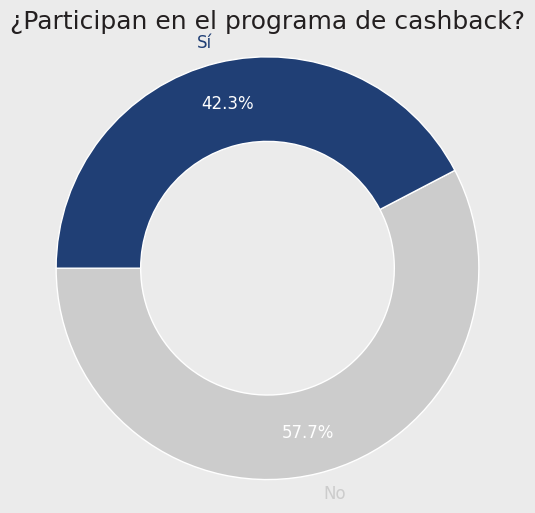

In [140]:
cashback().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos modificado otro gr√°fico, ahora el de dona, para representar la proporci√≥n de nuestros(as) clientes. Dimos mayor destaque al "S√≠", utilizando el color como recurso de punto focal.


## **5.3 - Ajustando los visuales de distribuci√≥n**

---


Ahora vamos con los √∫ltimos 2 gr√°ficos antes de la exportaci√≥n de los visuales. Vamos a aplicar m√°s t√©cnicas de storytelling que aprendimos mediante el uso de la IA.


### **Gr√°fico 6 - Evaluaciones de los productos:**


Agora vamos para a distribui√ß√£o das avalia√ß√µes dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El script original que genera el gr√°fico es el siguiente:

```python

plt.figure(figsize=(10, 6))

sns.histplot(data=dfCompleto, x='nota', bins=11, kde=False, color='skyblue')


plt.title('Distribuci√≥n de las Calificaciones de las Compras', fontsize=16)

plt.xlabel('Calificaci√≥n (0-10)', fontsize=12)

plt.ylabel('Frecuencia', fontsize=12)

plt.show()
```

Con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de las columnas en ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo es "Distribuci√≥n de las evaluaciones de las compras en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) tambi√©n deben tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

A√±adir una caja de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico. El texto de la anotaci√≥n es

```python
f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificaci√≥n m√°s com√∫n = {df['nota'].value_counts().idxmax()}\n Frecuencia m√°s com√∫n = {df['nota'].value_counts().max()}"
```

en color AZUL_1. A√±ade la caja de anotaci√≥n con el texto en la posici√≥n xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(8.7, 2250).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python

In [143]:
def distribucionCalificaciones():

  import matplotlib.pyplot as plt
  import seaborn as sns

  # Configurar el tama√±o del gr√°fico
  plt.figure(figsize=(10, 6), facecolor=GRIS_1) # Establecer color de fondo de la figura
  ax = sns.histplot(data=dfCompleto, x='nota', bins=11, kde=False, color=ROJO_1) # Establecer color de las barras y obtener el objeto Axes

  # Establecer color de fondo del gr√°fico
  ax.set_facecolor(GRIS_1)

  # A√±adir etiquetas y t√≠tulo
  ax.set_title('Distribuci√≥n de las evaluaciones de las compras en 2023', fontsize=18, color=GRIS_5) # T√≠tulo con color y tama√±o
  ax.set_xlabel('Calificaci√≥n (0-10)', fontsize=12, color=AZUL_1) # Etiqueta del eje x con color y tama√±o
  ax.set_ylabel('Frecuencia', fontsize=12, color=AZUL_1) # Etiqueta del eje y con color y tama√±o

  # Ajustar etiquetas de los ejes
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)
  ax.set_xticks(range(0, 11)) # Asegurar etiquetas de 0 a 10

  # Suprimir bordes del gr√°fico
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  # Agregar cuadr√≠cula punteada en y y colocarla detr√°s
  ax.yaxis.grid(True, linestyle='--', alpha=0.7)
  ax.set_axisbelow(True)

  # Calcular estad√≠sticas para la anotaci√≥n
  promedio_nota = dfCompleto['nota'].mean().round(2)
  calificacion_mas_comun = dfCompleto['nota'].value_counts().idxmax()
  frecuencia_mas_comun = dfCompleto['nota'].value_counts().max()

  # Texto de la anotaci√≥n
  texto_anotacion = f"Promedio de calificaciones = {promedio_nota}\nCalificaci√≥n m√°s com√∫n = {calificacion_mas_comun}\nFrecuencia m√°s com√∫n = {frecuencia_mas_comun}"

  # A√±adir caja de anotaci√≥n con flecha
  ax.annotate(texto_anotacion, xy=(8.7, 2250), xytext=(2, 1800),
              arrowprops=dict(facecolor=AZUL_1, shrink=0.05),
              fontsize=12, color=AZUL_1,
              bbox=dict(boxstyle='round,pad=0.5', fc=BLANCO, ec=GRIS_3))


  # Mostrar el gr√°fico
  plt.tight_layout()
  return plt

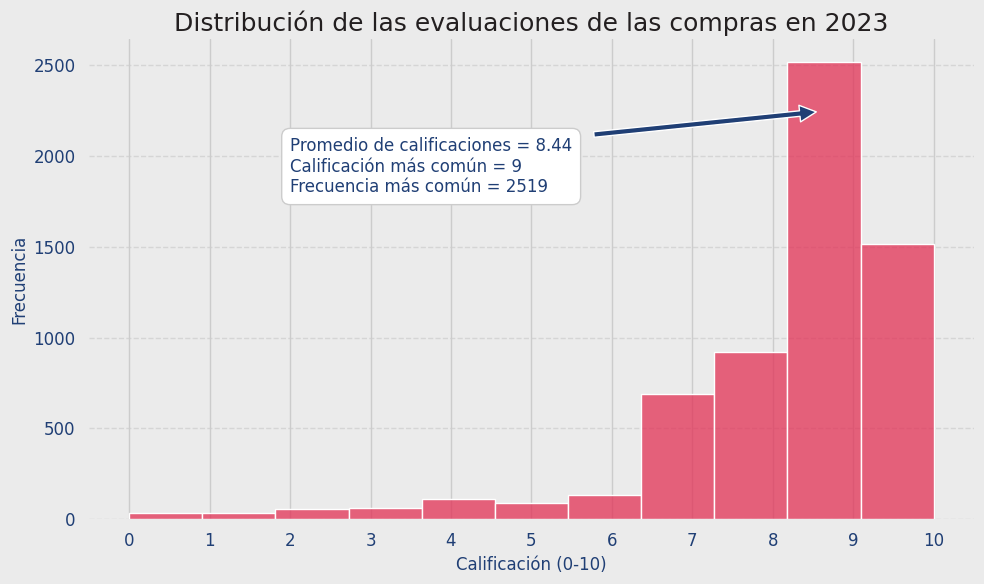

In [144]:
distribucionCalificaciones().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Una novedad m√°s en nuestro gr√°fico! A√±adimos la funci√≥n de caja de anotaciones, que es muy √∫til para proporcionar informaci√≥n sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.


### **Gr√°fico 7 - Distribuci√≥n del p√∫blico por edad y sexo biol√≥gico:**


Ahora vamos con nuestra √∫ltima visualizaci√≥n.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

El script original que genera el gr√°fico es el siguiente:

```python

plt.figure(figsize=(10, 6))

sns.boxplot(data=dfCompleto, x='sexo_biologico', y='edad', palette='viridis')

plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico', fontsize=16)
plt.xlabel('Sexo Biol√≥gico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

plt.show()
```

Con el fondo de la figura y del gr√°fico en el color GRIS_1, y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo es "Distribuci√≥n de la Edad por Sexo Biol√≥gico de los  clientes" con tama√±o 18 y su color GRIS_5.

La columna 'sexo_biologico' est√° representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los r√≥tulos del eje x y y (xticks y yticks) deben tener tama√±o 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) tambi√©n debe tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos y la cuadr√≠cula del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Agregar dos cajas de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico.

Texto de la primera anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[1]"
```

Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(-0.1, 45).

Texto de la segunda anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[0]"
```


Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(0.9, 45).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python

In [148]:
def boxPlotEdadSexo():
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Configurar el tama√±o del gr√°fico
  plt.figure(figsize=(10, 6), facecolor=GRIS_1)

  # Crear el gr√°fico de boxplot
  ax = sns.boxplot(data=dfCompleto, x='sexo_biologico', y='edad', palette=[AZUL_1, AQUA_1]) # Usar palette con los colores de Zoop

  # Establecer color de fondo del gr√°fico
  ax.set_facecolor(GRIS_1)

  # A√±adir etiquetas y t√≠tulo
  ax.set_title('Distribuci√≥n de la Edad por Sexo Biol√≥gico de los clientes', fontsize=18, color=GRIS_5)
  ax.set_xlabel('') # Suprimir etiqueta del eje x
  ax.set_ylabel('Edad', fontsize=12, color=AZUL_1) # Etiqueta del eje y con color y tama√±o

  # Ajustar etiquetas de los ejes
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

  # Suprimir bordes del gr√°fico
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  # Agregar cuadr√≠cula punteada en y y colocarla detr√°s
  ax.yaxis.grid(True, linestyle='--', alpha=0.7)
  ax.set_axisbelow(True)

  # Calcular estad√≠sticas para las anotaciones
  grouped_edad = dfCompleto.groupby("sexo_biologico")["edad"]

  # Estad√≠sticas para el primer grupo (√≠ndice 0 en orden alfab√©tico, que es Femenino)
  min_edad_0 = grouped_edad.min()[0]
  q1_edad_0 = grouped_edad.quantile(.25)[0]
  median_edad_0 = grouped_edad.median()[0]
  q3_edad_0 = grouped_edad.quantile(.75)[0]
  max_edad_0 = grouped_edad.max()[0]

  # Estad√≠sticas para el segundo grupo (√≠ndice 1 en orden alfab√©tico, que es Masculino)
  min_edad_1 = grouped_edad.min()[1]
  q1_edad_1 = grouped_edad.quantile(.25)[1]
  median_edad_1 = grouped_edad.median()[1]
  q3_edad_1 = grouped_edad.quantile(.75)[1]
  max_edad_1 = grouped_edad.max()[1]

  # Texto de la primera anotaci√≥n (para el primer grupo - Femenino)
  texto_anotacion_0 = f"M√≠nimo = {min_edad_0}\n1¬∫ quartil = {q1_edad_0}\n2¬∫ quartil = {median_edad_0}\n3¬∫ quartil = {q3_edad_0}\nM√°ximo = {max_edad_0}"

  # Texto de la segunda anotaci√≥n (para el segundo grupo - Masculino)
  texto_anotacion_1 = f"M√≠nimo = {min_edad_1}\n1¬∫ quartil = {q1_edad_1}\n2¬∫ quartil = {median_edad_1}\n3¬∫ quartil = {q3_edad_1}\nM√°ximo = {max_edad_1}"


  # A√±adir la primera caja de anotaci√≥n con flecha
  ax.annotate(texto_anotacion_0, xy=(-0.1, 45), xytext=(-0.4, 50), # Ajustar xy para apuntar a la caja correspondiente
              arrowprops=dict(facecolor=AZUL_1, shrink=0.05),
              fontsize=10, color=AZUL_1,
              bbox=dict(boxstyle='round,pad=0.5', fc=BLANCO, ec=GRIS_3))

  # A√±adir la segunda caja de anotaci√≥n con flecha
  ax.annotate(texto_anotacion_1, xy=(0.9, 45), xytext=(0.6, 50), # Ajustar xy para apuntar a la caja correspondiente
              arrowprops=dict(facecolor=AZUL_1, shrink=0.05),
              fontsize=10, color=AZUL_1,
              bbox=dict(boxstyle='round,pad=0.5', fc=BLANCO, ec=GRIS_3))


  # Mostrar el gr√°fico
  plt.tight_layout()
  return plt

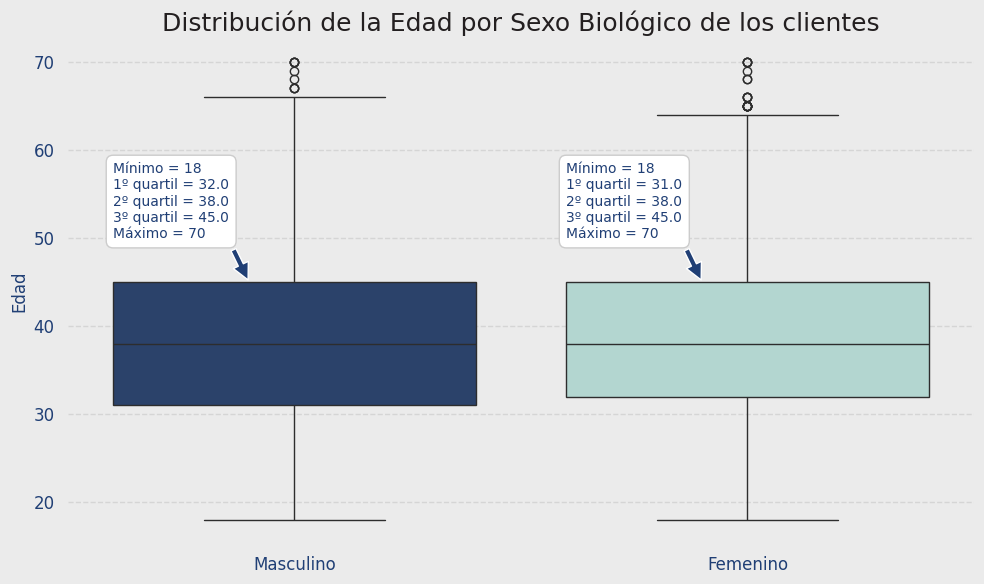

In [149]:
boxPlotEdadSexo().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Para nuestro √∫ltimo gr√°fico, creamos nuevamente el bloque de anotaciones se√±alando los valores que se muestran en un boxplot. Notamos que la distribuci√≥n entre los clientes de sexo biol√≥gico masculino y femenino es bastante cercana, con solo un a√±o de diferencia en el rango intercuartil (del 1¬∫ al 3¬∫ cuartil) en el caso del sexo biol√≥gico masculino. Zoop tiene en la mediana una clientela de 38 a√±os de edad para ambos sexos.


## **5.4 - Exportando las visualizaciones**

---



¬°Listo! Ahora que hemos finalizado los ajustes de todos los gr√°ficos solicitados, generaremos un √∫ltimo c√≥digo para exportar cada uno de los gr√°ficos que transformamos en funciones en formato de imagen (PNG).

<strong><font color="7b71ff" size =6>Prompt:</font></strong>
Ahora, vamos a nuestra √∫ltima etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gr√°ficos que generamos dentro de una funci√≥n y quiero que se aplique el siguiente procedimiento a cada una de ellas:

```
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
```
Las funciones son:


*   metodoPago()
*   ventasMensuales()
*   facturacionCategoria()
*   ventasTrimestre()
*   cashback()
*   distribucionCalificaciones()
*   boxPlotEdadSexo()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la funci√≥n que genera el gr√°fico.

Utiliza el lenguaje Python para crear el c√≥digo y no mostrar las im√°genes.

¬°Ahora es tu turno! ¬øQu√© tal descargar los gr√°ficos y generar un informe con algunos insights y explicando los resultados?

¬°Espero que hayas disfrutado este curso y saques el m√°ximo provecho del contenido!

**Reasoning**:
Import the necessary libraries for data visualization and set the plotting style and figure size.



In [122]:
# Lista de funciones que generan los gr√°ficos
funciones_graficos = [
    metodoPago,
    ventasMensuales,
    facturacionCategoria,
    ventasTrimestre,
    cashback,
    distribucionCalificaciones,
    boxPlotEdadSexo
]

# Exportar cada gr√°fico
for func in funciones_graficos:
    # Generar el nombre del archivo basado en el nombre de la funci√≥n
    nombre_base = func.__name__
    nombre_archivo = f"grafico_{nombre_base}.png"

    # Llamar a la funci√≥n para generar el gr√°fico
    # Asegurarse de que la funci√≥n retorna el objeto plt
    grafico = func()

    # Guardar el gr√°fico como imagen
    grafico.savefig(nombre_archivo, bbox_inches='tight')

    # Cerrar el gr√°fico para liberar memoria
    grafico.close()

    print(f"Gr√°fico '{nombre_archivo}' exportado exitosamente.")